## 1. Problem Statement

###  *How can we leverage AI-driven solutions to accurately forecast resale flat prices in Singapore's public housing market, incorportating the impact of nearby amenities to address the need for precision amidst market fluctuations?*

## 2. Data Acquisition 

The second phase of the AI project lifecyle, which is focused on obtaining the necessary data for the project.

The main source of data, which is our base data was obtained from "https://beta.data.gov.sg/" and Kaggle. The open source government website is Singapore's open data collective that allows users to explore national datasets, download raw data for research analysis and access web APIs for web development.

We obtained our primary dataset from Kaggle labelled as "Singapore Public Housing Resale Flat Prices, which contains 155,822 rows of HDB flats transactions from Year 2017 to 2023. However, the information provided in this dataset were insufficient as only data on flats such as its size, model and location was shown. 

Therefore, we decided to use additional datasets, our secondary data sources as seen below, in the form of csv files to aid us in predicting accurately for this project. 
 
* HDB Property Information - Contains information on resale flat prices and also has features like 'Maximum floor level'.

* Government Hawker Centres - Contains information about hawker centres, shows accessibility to afforable food.

* MRT Stations - Contains information on MRT stations, shows accessibility to transport.

* Primary Schools - Contains information on Primary schools, measure of accessibility to early education depending on proximity to primary school. 

* Shopping Malls - Contains information on Shopping malls, shows accessbility to leisure. 

### Refer to **Processed Notebooks folder** for retrieving data using OneMap API for the different amenities

We have used an <b>API called OneMap</b> to retrieve nearby amenities to the flats. Such amenities include <b>MRT, Shopping Malls, Primary Schools and Hawker Centres.</b> OneMap is the authoritative national map of Singapore with the most detailed and updated information developed by the Singapore Land Authority. 

It provides APIs for developers to build on top of its services such as location search and routing.

The <b>final data frame</b> was derived from <b>merging</b> all the processed datasets

## 3. Data Cleaning and Exploration

The third phase in the AI project lifecycle where we visualise the data we have at hand. 

Data is a bunch of numbers and its complex to understand as it is. Hence, this phase allows us to spot trends and patterns while simultaenously preparing the data for modelling. 

In this phase, we would be cleaning the data and exploring what the dataset contains. 

### 3.1 Data Cleaning 

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [24]:
# load final dataset
df_final = pd.read_csv('final_merged_dataset.csv')

# remove 'Index' column
if 'Index' in df_final.columns:
    df_final.drop(columns=['Index'], inplace=True)


# print data types of variables
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155821 entries, 0 to 155820
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Town                      155821 non-null  object 
 1   FlatType                  155821 non-null  object 
 2   Block                     155821 non-null  object 
 3   Street                    155821 non-null  object 
 4   StoreyRange               155821 non-null  object 
 5   FloorAreaSqm              155821 non-null  float64
 6   FlatModel                 155821 non-null  object 
 7   LeaseCommenceDate         155821 non-null  int64  
 8   RemainingLease            155821 non-null  object 
 9   Price                     155821 non-null  float64
 10  Year                      155821 non-null  int64  
 11  Month                     155821 non-null  int64  
 12  Address                   155821 non-null  object 
 13  Latitude                  155492 non-null  f

In [25]:
# peek top 3
df_final.head(3)

,Town,FlatType,Block,Street,StoreyRange,FloorAreaSqm,FlatModel,LeaseCommenceDate,RemainingLease,Price,...,MRTDistribution,NearestHawkerCentre,DistanceFromHawkerCentre,HawkerCentreDistribution,NearestSchool,DistanceFromSchool,SchoolDistribution,NearestShoppingMall,DistanceFromShoppingMall,ShoppingMallDistribution
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,...,More than-1km,Blk 409 Ang Mo Kio Ave 10,0.17241064129214373 km,within-1km,Townsville Primary School,0.2181254395256675 km,within-1km,AMK Hub,1.003018118556015 km,More than-1km
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,...,More than-1km,Blk 724 Ang Mo Kio Ave 6,0.9341909181314921 km,within-1km,Ang Mo Kio Primary School,0.2415753425097763 km,within-1km,Broadway Plaza,0.868861431290418 km,within-1km
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,...,More than-1km,Sembawang Hill Food Centre,1.166164248332101 km,More than-1km,Anderson Primary School,0.7771571662417865 km,within-1km,Broadway Plaza,1.5255730377820635 km,More than-1km


In [26]:
# peek bottom 3 
df_final.tail(3)

,Town,FlatType,Block,Street,StoreyRange,FloorAreaSqm,FlatModel,LeaseCommenceDate,RemainingLease,Price,...,MRTDistribution,NearestHawkerCentre,DistanceFromHawkerCentre,HawkerCentreDistribution,NearestSchool,DistanceFromSchool,SchoolDistribution,NearestShoppingMall,DistanceFromShoppingMall,ShoppingMallDistribution
155818,YISHUN,5 ROOM,613,YISHUN ST 61,01 TO 03,121.0,Improved,1987,62 years 11 months,565000.0,...,within-1km,Chong Pang Market & Food Centre,1.4653787639732154 km,More than-1km,Naval Base Primary School,0.5705025243695171 km,within-1km,Wisteria Mall,0.7096434843832458 km,within-1km
155819,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,143.0,Apartment,1987,63 years 04 months,845000.0,...,within-1km,Chong Pang Market & Food Centre,1.3315649621256602 km,More than-1km,Peiying Primary School,0.5047072189538684 km,within-1km,Wisteria Mall,0.907007619831424 km,within-1km
155820,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,64 years 03 months,895000.0,...,More than-1km,Chong Pang Market & Food Centre,2.001295123950408 km,More than-1km,Huamin Primary School,0.22821915587425576 km,within-1km,Wisteria Mall,0.931337724752111 km,within-1km


In [27]:
# check for null values
print(df_final.isnull().sum())

Town                          0
FlatType                      0
Block                         0
Street                        0
StoreyRange                   0
FloorAreaSqm                  0
FlatModel                     0
LeaseCommenceDate             0
RemainingLease                0
Price                         0
Year                          0
Month                         0
Address                       0
Latitude                    329
Longitude                   329
Postal                      329
MaxFloorLevel                 0
YearCompleted                 0
MarketHawker                  0
MultistoreyCarpark            0
TotalDwellingUnits            0
RemainingLeaseINT             0
StoreyRangeINT                0
NearestMRT                  329
DistanceFromMRT             329
MRTDistribution             329
NearestHawkerCentre         329
DistanceFromHawkerCentre    329
HawkerCentreDistribution    329
NearestSchool               329
DistanceFromSchool          329
SchoolDi

In [28]:
# deal with missing values by dropping those values
df_final.dropna(inplace=True)
print(df_final.isnull().sum())

Town                        0
FlatType                    0
Block                       0
Street                      0
StoreyRange                 0
FloorAreaSqm                0
FlatModel                   0
LeaseCommenceDate           0
RemainingLease              0
Price                       0
Year                        0
Month                       0
Address                     0
Latitude                    0
Longitude                   0
Postal                      0
MaxFloorLevel               0
YearCompleted               0
MarketHawker                0
MultistoreyCarpark          0
TotalDwellingUnits          0
RemainingLeaseINT           0
StoreyRangeINT              0
NearestMRT                  0
DistanceFromMRT             0
MRTDistribution             0
NearestHawkerCentre         0
DistanceFromHawkerCentre    0
HawkerCentreDistribution    0
NearestSchool               0
DistanceFromSchool          0
SchoolDistribution          0
NearestShoppingMall         0
DistanceFr

In [29]:
# remove km from distance to amenities
remove_km = ['DistanceFromSchool', 'DistanceFromMRT', 'DistanceFromHawkerCentre', 'DistanceFromShoppingMall']

for column in remove_km:
    df_final[column] = df_final[column].str.replace('km', '')

# Convert those columns to numeric
for column in remove_km:
    df_final[column] = pd.to_numeric(df_final[column])


### 3.2. Data Exploration - Exploratory Data Analysis (EDA)

- Visualisation of Categorical variables - understand the distribution of each variable.
- Visualisation of Continuous variables - understand the central tendency and spread of the variable.

                  Price
FlatType               
1 ROOM               61
2 ROOM             2484
3 ROOM            36486
4 ROOM            65259
5 ROOM            39222
EXECUTIVE         11908
MULTI-GENERATION     72


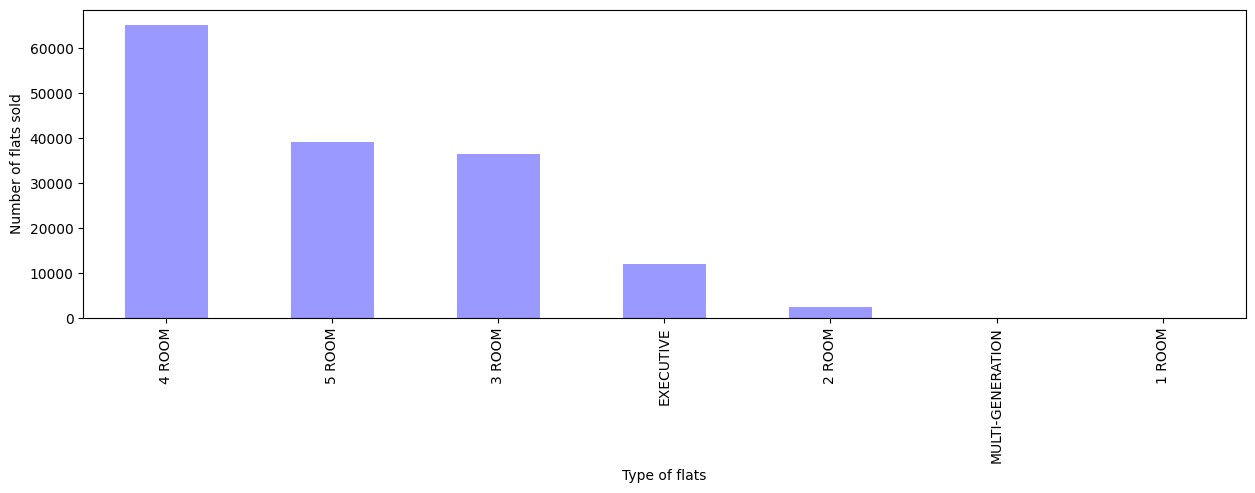

In [30]:
# View counts of different flat types sold
# Results: lack of transaction activities for flat type - "1 ROOM", "2 ROOMS" and "Multi-Generation" flat types.
print(df_final.pivot_table(values='Price', index='FlatType',aggfunc=pd.Series.count))

group_df = df_final.groupby('FlatType')['FlatType'].agg('count')
fig, axes = plt.subplots(figsize=(15, 4))
group_df.sort_values(ascending=False).plot(kind='bar', color='b', alpha=0.4)

plt.ylabel('Number of flats sold')
plt.xlabel('Type of flats')
plt.show()

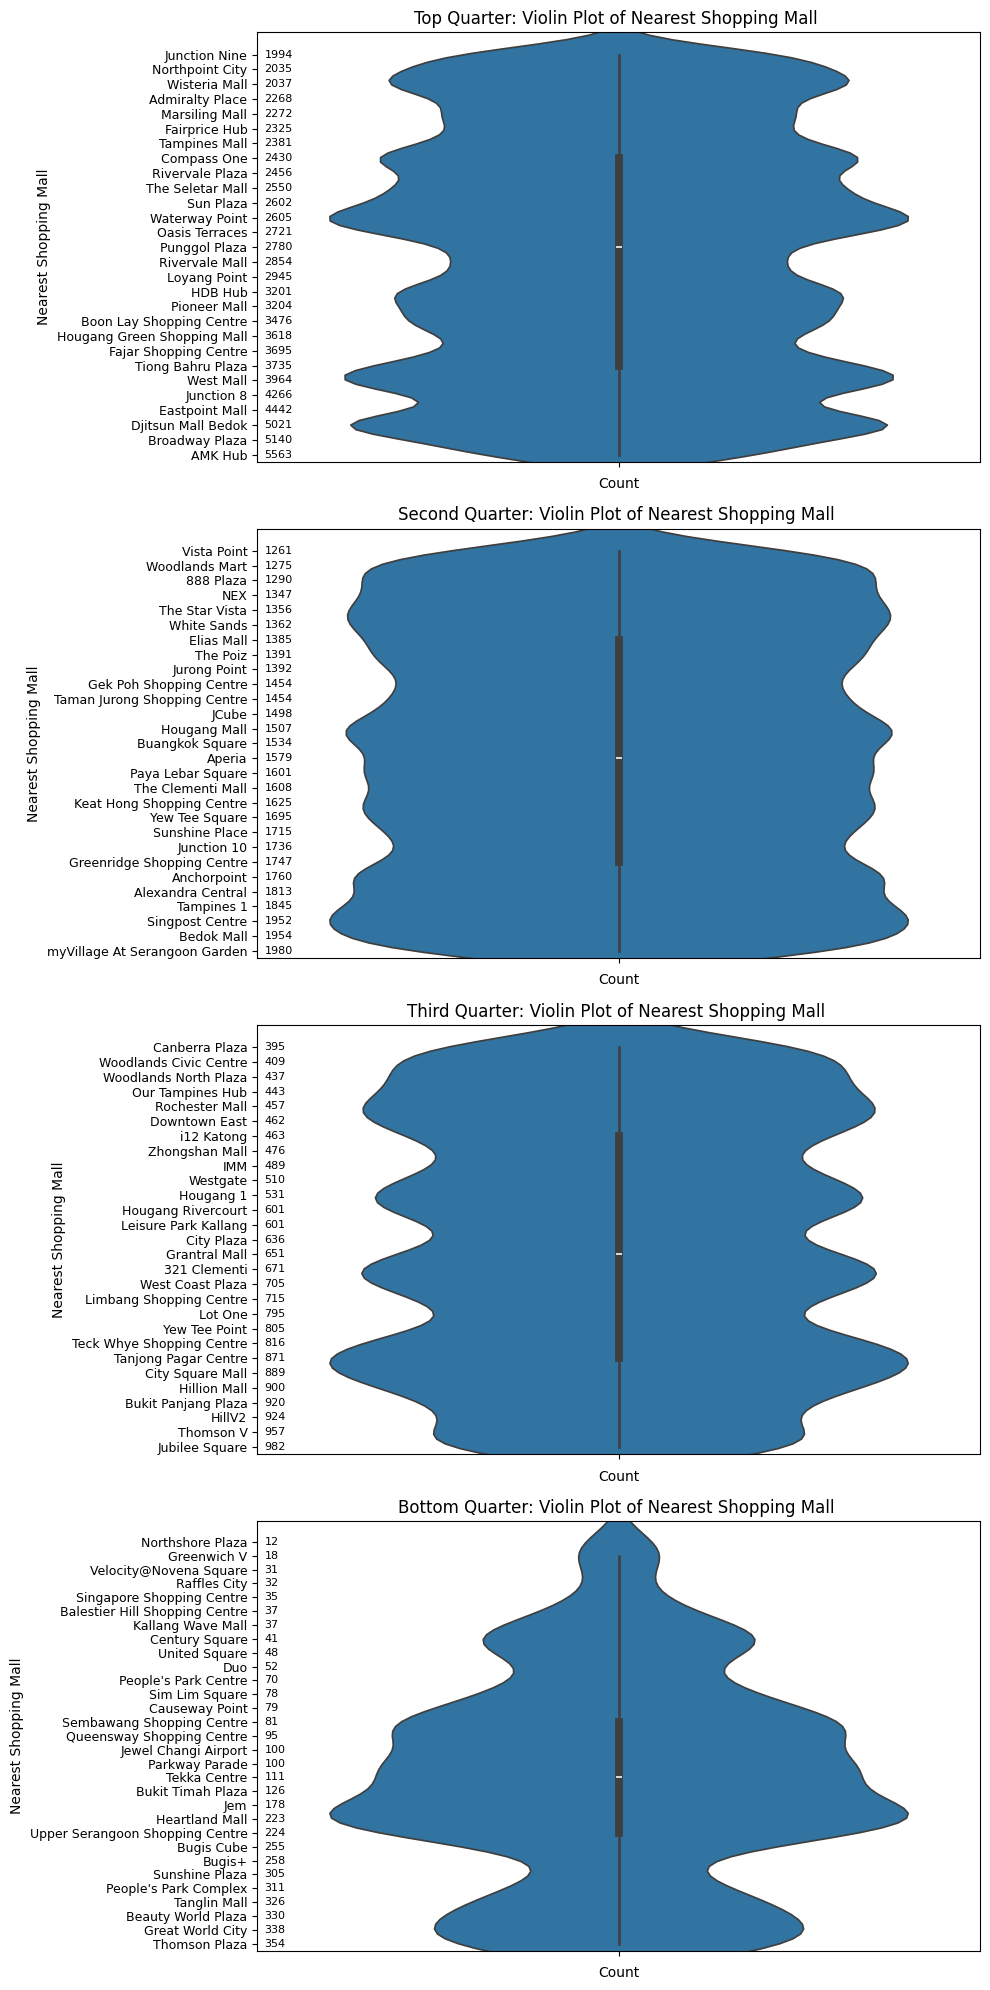

In [31]:
# Violin plot for Nearest Shopping Mall - Categorical variable
# A violin plot displays the distribution of data across categories using the width to represent density 
# Kernel density estimate to show the overall shape
# White dot/mark represents the median of the data
# Rectangle/Box represents the Interquartile Range (IQR) - 25th percentile to the 75th percentile
# Whiskers represents range of the data beyond the IQR (excluding outliers)

sorted_counts = df_final['NearestShoppingMall'].value_counts().sort_values(ascending=False)

# Divide the sorted counts into quarters
quarter_point = len(sorted_counts) // 4
top_quarter = sorted_counts[:quarter_point]
second_quarter = sorted_counts[quarter_point:2*quarter_point]
third_quarter = sorted_counts[2*quarter_point:3*quarter_point]
bottom_quarter = sorted_counts[3*quarter_point:]

# Create four separate plots
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# Plot top quarter
sns.violinplot(y=df_final[df_final['NearestShoppingMall'].isin(top_quarter.index)]['NearestShoppingMall'], ax=axes[0])
axes[0].set_title('Top Quarter: Violin Plot of Nearest Shopping Mall ')
axes[0].set_ylabel('Nearest Shopping Mall')
axes[0].set_xlabel('Count')
axes[0].tick_params(axis='y', labelsize=9)
axes[0].set_ylim(-0.5, len(top_quarter) + 0.5)

# Add annotations for count on violins
for i, (mall, count) in enumerate(top_quarter.items()):
    axes[0].text(-0.49, i, f'{count}', verticalalignment='center', fontsize=8)

# Plot second quarter
sns.violinplot(y=df_final[df_final['NearestShoppingMall'].isin(second_quarter.index)]['NearestShoppingMall'], ax=axes[1])
axes[1].set_title('Second Quarter: Violin Plot of Nearest Shopping Mall ')
axes[1].set_ylabel('Nearest Shopping Mall')
axes[1].set_xlabel('Count')
axes[1].tick_params(axis='y', labelsize=9)
axes[1].set_ylim(-0.5, len(second_quarter) + 0.5)

# Add annotations for count on violins
for i, (mall, count) in enumerate(second_quarter.items()):
    axes[1].text(-0.49, i, f'{count}', verticalalignment='center', fontsize=8)

# Plot third quarter
sns.violinplot(y=df_final[df_final['NearestShoppingMall'].isin(third_quarter.index)]['NearestShoppingMall'], ax=axes[2])
axes[2].set_title('Third Quarter: Violin Plot of Nearest Shopping Mall ')
axes[2].set_ylabel('Nearest Shopping Mall')
axes[2].set_xlabel('Count')
axes[2].tick_params(axis='y', labelsize=9)
axes[2].set_ylim(-0.5, len(third_quarter) + 0.5)

# Add annotations for count on violins
for i, (mall, count) in enumerate(third_quarter.items()):
    axes[2].text(-0.49, i, f'{count}', verticalalignment='center', fontsize=8)

# Plot bottom quarter
sns.violinplot(y=df_final[df_final['NearestShoppingMall'].isin(bottom_quarter.index)]['NearestShoppingMall'], ax=axes[3])
axes[3].set_title('Bottom Quarter: Violin Plot of Nearest Shopping Mall ')
axes[3].set_ylabel('Nearest Shopping Mall')
axes[3].set_xlabel('Count')
axes[3].tick_params(axis='y', labelsize=9)
axes[3].set_ylim(-0.5, len(bottom_quarter) + 0.5)

# Add annotations for count on violins
for i, (mall, count) in enumerate(bottom_quarter.items()):
    axes[3].text(-0.49, i, f'{count}', verticalalignment='center', fontsize=8)

plt.tight_layout()
plt.show()

The above Violin plots show the distribution of the Nearest Shopping Malls in the dataset for each Resale Unit. 
It can be inferred that there are lesser Resale Flats around the Shopping Malls Northshore Plaza and Greenwich V. While AMK Hub and Broadway Plaza is closer to most of the Resale flats.

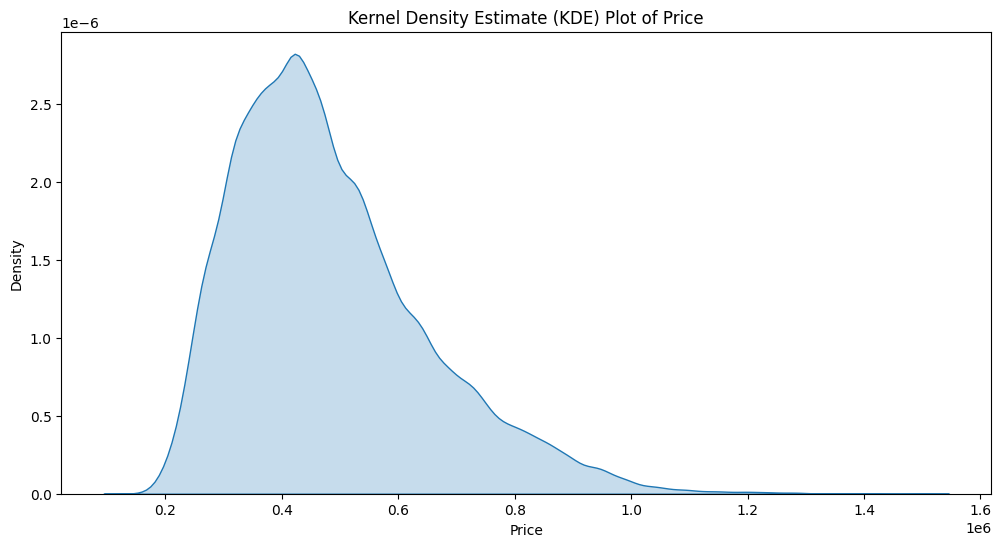

In [32]:
# Create a KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(df_final['Price'], fill=True)

# Set plot title and labels
plt.title('Kernel Density Estimate (KDE) Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')

# Show the plot
plt.show()

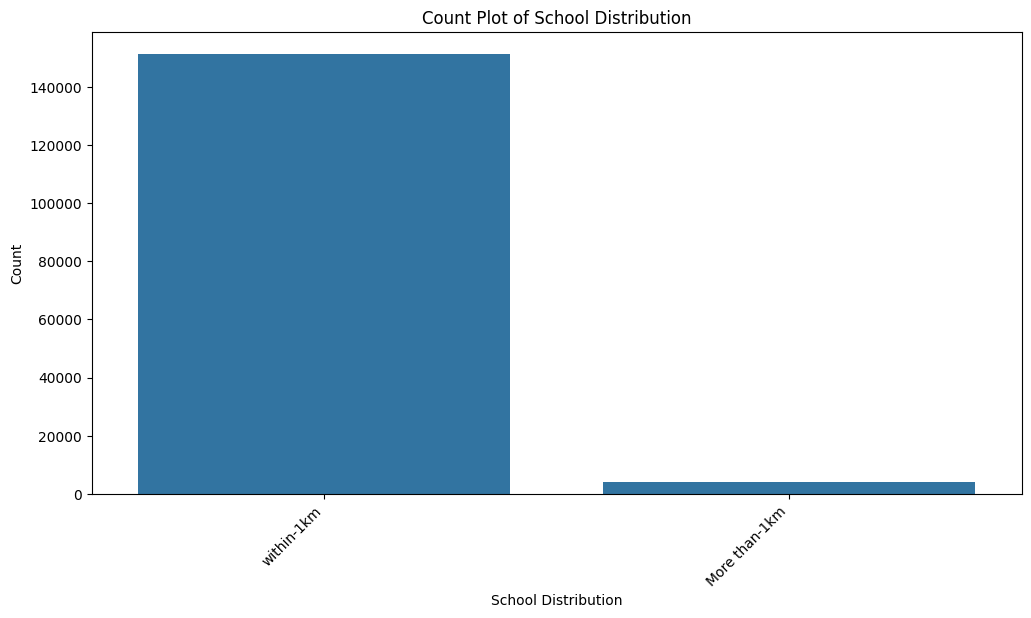

In [33]:
# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='SchoolDistribution', data=df_final, order=df_final['SchoolDistribution'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set plot title and labels
plt.title('Count Plot of School Distribution')
plt.xlabel('School Distribution')
plt.ylabel('Count')

# Show the plot
plt.show()

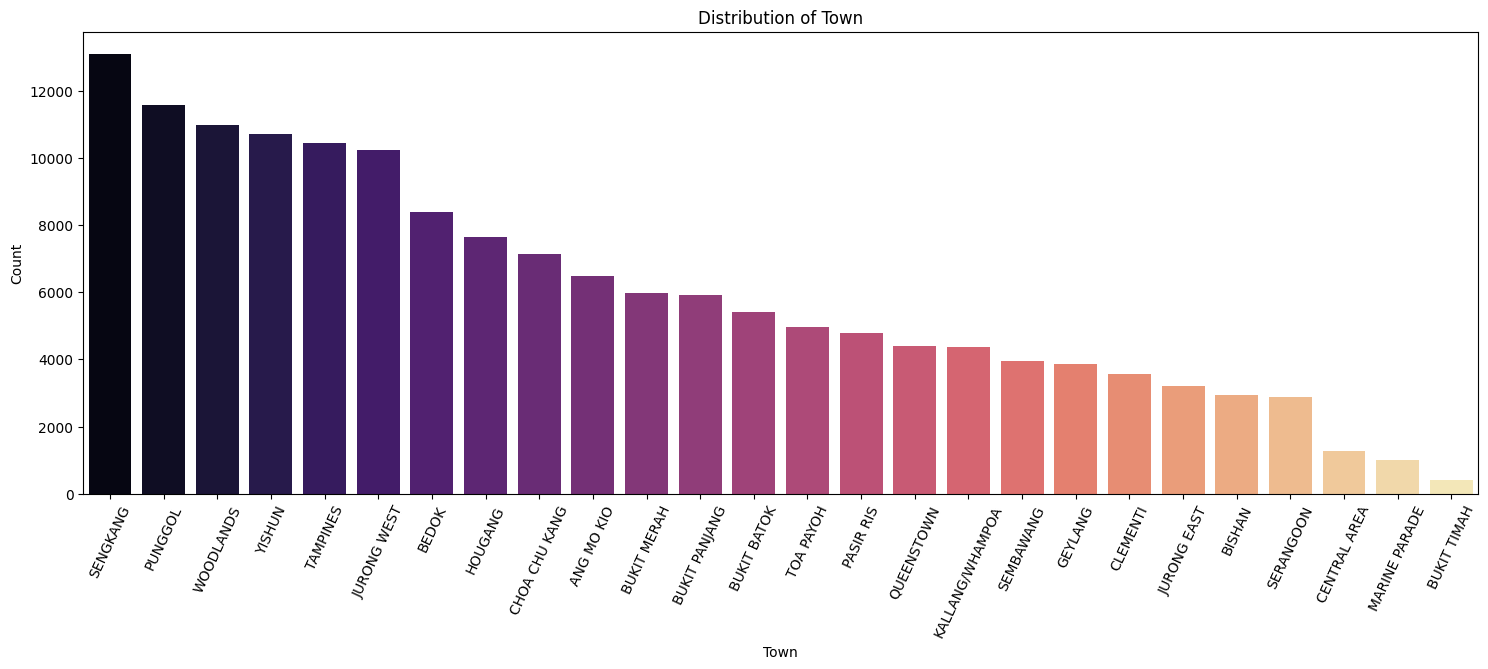

In [34]:
# Bar plot for Town - Categorical variable
plt.figure(figsize=(18, 6))

sns.barplot(x=df_final['Town'].value_counts().index, y=df_final['Town'].value_counts(), palette='magma')

plt.title('Distribution of Town')
plt.xlabel('Town')
plt.ylabel('Count')

plt.xticks(rotation=65)

plt.show()


Above plot gives us insights on which towns in Singapore have the highest number of HDB resale flat transactions. As shown below, the HDBs in Sengkang have the most resale transactions whereas HDBs in Bukit Timah have the least number of resale transactions made in the year 2017 to 2023. 

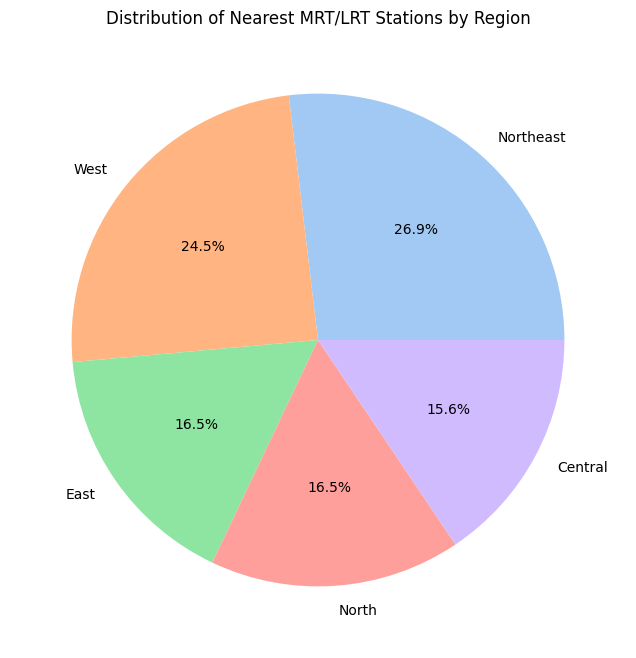

In [35]:
stations_by_region = {
    'North': [
        'YISHUN MRT STATION',
        'KHATIB MRT STATION',
        'SEMBAWANG MRT STATION',
        'CANBERRA MRT STATION',
        'WOODLANDS MRT STATION',
        'MARSILING MRT STATION',
        'ADMIRALTY MRT STATION',
        'WOODLANDS NORTH MRT STATION',
        'WOODLANDS SOUTH MRT STATION'
    ],
    
    'Northeast': [
        'ANG MO KIO MRT STATION',
        'PUNGGOL MRT STATION',
        'PUNGGOL LRT STATION',
        'OASIS LRT STATION',
        'COVE LRT STATION',
        'SUMANG LRT STATION',
        'DAMAI LRT STATION',
        'CORAL EDGE LRT STATION',
        'MERIDIAN LRT STATION',
        'KADALOOR LRT STATION',
        'NIBONG LRT STATION',
        'HOUGANG MRT STATION',
        'KOVAN MRT STATION',
        'BUANGKOK MRT STATION',
        'COMPASSVALE LRT STATION',
        'RIVIERA LRT STATION',
        'CHENG LIM LRT STATION',
        'TONGKANG LRT STATION',
        'RANGGUNG LRT STATION',
        'THANGGAM LRT STATION',
        'KANGKAR LRT STATION',
        'LAYAR LRT STATION',
        'RENJONG LRT STATION',
        'BAKAU LRT STATION',
        'RUMBIA LRT STATION',
        'FARMWAY LRT STATION',
        'SENGKANG MRT STATION',
        'BARTLEY MRT STATION',
        'SERANGOON MRT STATION',
        'TAI SENG MRT STATION',
        'FERNVALE LRT STATION',
        'SOO TECK LRT STATION',
        'SENGKANG LRT STATION',
        'KUPANG LRT STATION',
        'YIO CHU KANG MRT STATION'
    ],

    'Central': [
        'BISHAN MRT STATION',
        'BRAS BASAH MRT STATION',
        'ESPLANADE MRT STATION',
        'LITTLE INDIA MRT STATION',
        'TANJONG PAGAR MRT STATION',
        'MARYMOUNT MRT STATION',
        'TIONG BAHRU MRT STATION',
        'HARBOURFRONT MRT STATION',
        'QUEENSTOWN MRT STATION',
        'ONE-NORTH MRT STATION',
        'PASIR PANJANG MRT STATION',
        'REDHILL MRT STATION',
        'FARRER ROAD MRT STATION',
        'CHINATOWN MRT STATION',
        'JALAN BESAR MRT STATION',
        'BENCOOLEN MRT STATION',
        'OUTRAM PARK MRT STATION',
        'NOVENA MRT STATION',
        'CALDECOTT MRT STATION',
        'BOTANIC GARDENS MRT STATION',
        'BENDEMEER MRT STATION',
        'ROCHOR MRT STATION',
        'FARRER PARK MRT STATION',
        'LORONG CHUAN MRT STATION',
        'TOA PAYOH MRT STATION',
        'WOODLEIGH MRT STATION',
        'BRADDELL MRT STATION',
        'POTONG PASIR MRT STATION', 
        'HOLLAND VILLAGE MRT STATION',
        'TELOK BLANGAH MRT STATION',
        'LABRADOR PARK MRT STATION',
        'ALJUNIED MRT STATION',
        'KALLANG MRT STATION',
        'MACPHERSON MRT STATION',
        'BOON KENG MRT STATION',
        'MATTAR MRT STATION',
        'UBI MRT STATION',
        'BUGIS MRT STATION',
        'LAVENDER MRT STATION',
        'MOUNTBATTEN MRT STATION',
        'GEYLANG BAHRU MRT STATION'
    ],

    'West': [
        'BUKIT PANJANG MRT STATION',
        'BUKIT GOMBAK MRT STATION',
        'BUKIT BATOK MRT STATION',
        'JURONG EAST MRT STATION',
        'CHINESE GARDEN MRT STATION',
        'LAKESIDE MRT STATION',
        'BOON LAY MRT STATION',
        'PIONEER MRT STATION',
        'CLEMENTI MRT STATION',
        'DOVER MRT STATION',
        'BUONA VISTA MRT STATION',
        'COMMONWEALTH MRT STATION',
        'PIONEER MRT STATION',
        'BEAUTY WORLD MRT STATION',
        'YEW TEE MRT STATION',
        'KING ALBERT PARK MRT STATION',
        'HILLVIEW MRT STATION',
        'CHOA CHU KANG MRT STATION',
        'CHOA CHU KANG LRT STATION',
        'PENDING LRT STATION',
        'SOUTH VIEW LRT STATION',
        'PHOENIX LRT STATION',
        'TECK WHYE LRT STATION',
        'BANGKIT LRT STATION',
        'BUKIT PANJANG LRT STATION',
        'KEAT HONG LRT STATION',
        'FAJAR LRT STATION',
        'TEN MILE JUNCTION LRT STATION',
        'SENJA LRT STATION',
        'SEGAR LRT STATION',
        'JELAPANG LRT STATION',
        'PETIR LRT STATION'
    ],

    'East': [
        'TAMPINES MRT STATION',
        'TAMPINES EAST MRT STATION',
        'TAMPINES WEST MRT STATION',
        'TANAH MERAH MRT STATION',
        'SIMEI MRT STATION',
        'UPPER CHANGI MRT STATION',
        'CHANGI AIRPORT MRT STATION',
        'BEDOK MRT STATION',
        'BEDOK RESERVOIR MRT STATION',
        'BEDOK NORTH MRT STATION',
        'KEMBANGAN MRT STATION',
        'KAKI BUKIT MRT STATION',
        'PAYA LEBAR MRT STATION',
        'DAKOTA MRT STATION',
        'EUNOS MRT STATION',
        'PASIR RIS MRT STATION'
    ]
}


# Reverse mapping of MRT stations to regions
stations_to_region = {mrt: region for region, mrt_list in stations_by_region.items() for mrt in mrt_list}

df_final['Region'] = df_final['NearestMRT'].map(stations_to_region)
region_counts = df_final['Region'].value_counts()

# Group regions with less than 1.5% of the total MRT stations together
threshold = 0.015 * region_counts.sum()
small_regions = region_counts[region_counts < threshold].index
df_final['Region'] = df_final['Region'].apply(lambda x: 'Occurance of MRT stations less than 1.5%' if x in small_regions else x)

region_counts = df_final['Region'].value_counts()

# Plot a pie chart for MRT stations grouped by region
plt.figure(figsize=(10, 8), facecolor='white')
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Nearest MRT/LRT Stations by Region')

plt.show()

The pie chart above shows the distribution of nearest MRT stations grouped by their regions. The west of Singapore has the most number of MRT stations near HDB properties, followed closely by Northeast of Singapore. The central region has the least number of MRT stations near HDB properties.

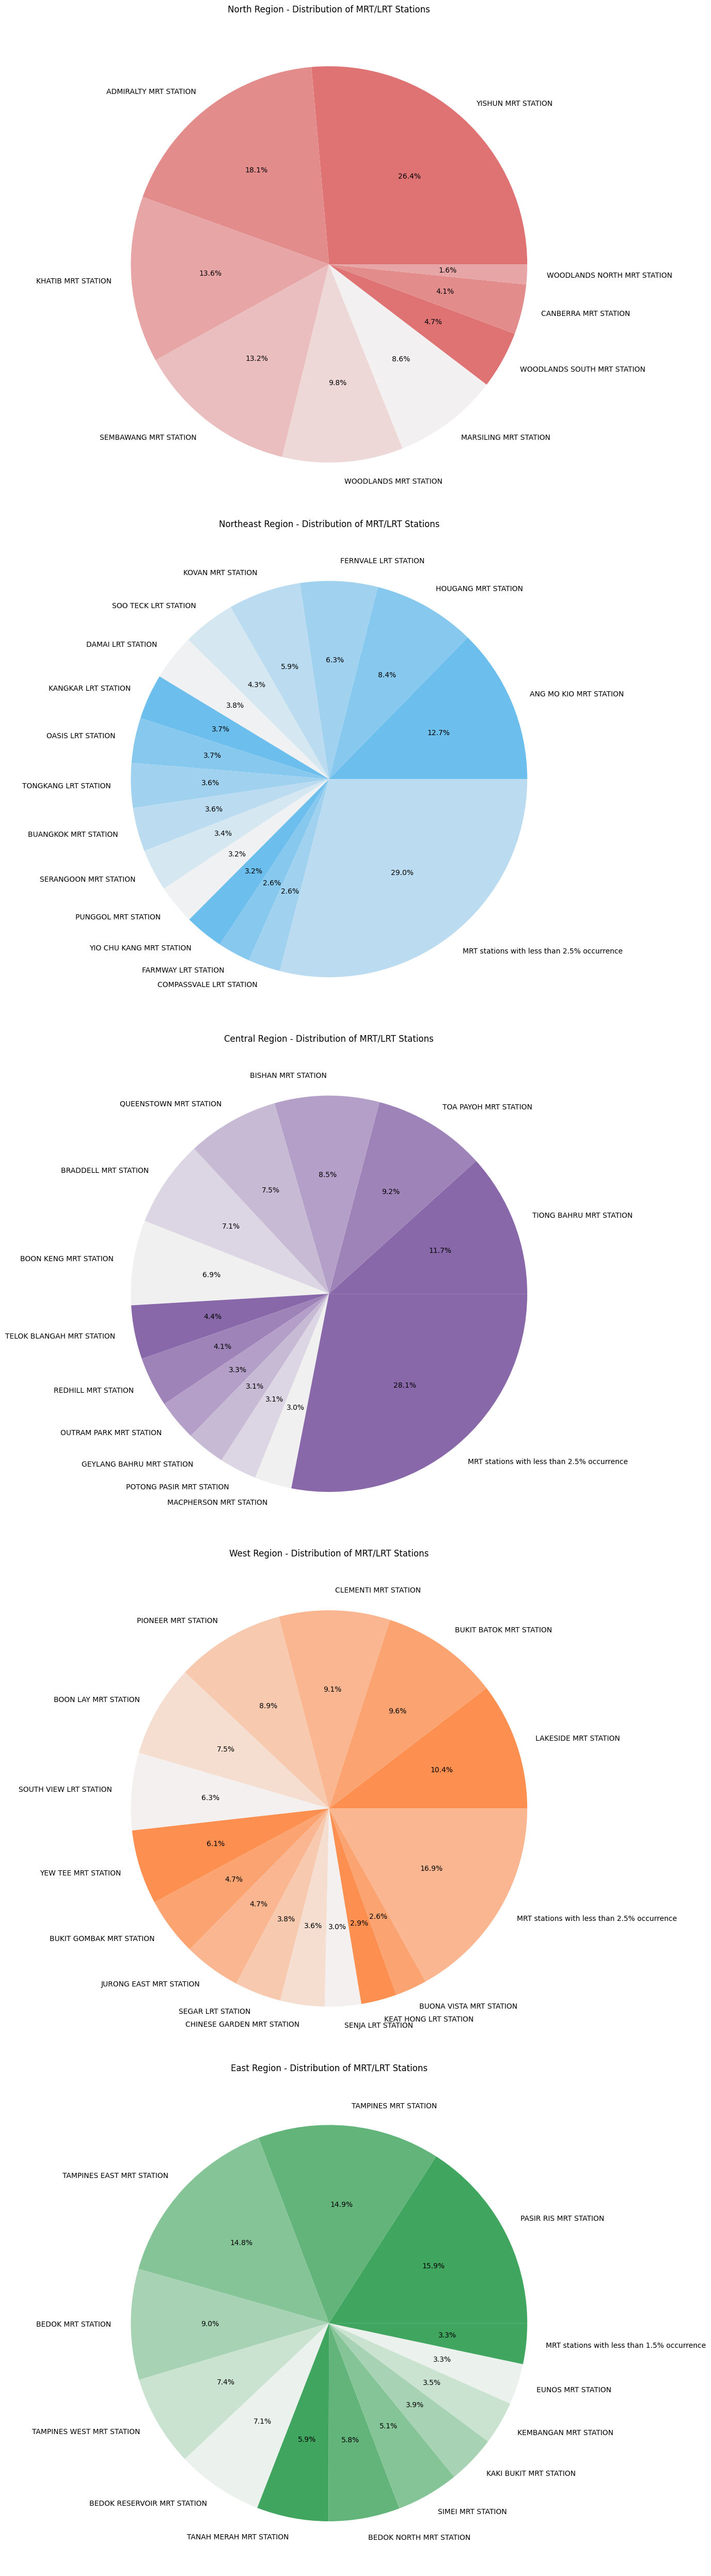

In [36]:
# Filter dataset for each region
north_stations = df_final[df_final['Region'] == 'North']['NearestMRT'].value_counts()
northeast_stations = df_final[df_final['Region'] == 'Northeast']['NearestMRT'].value_counts()
central_stations = df_final[df_final['Region'] == 'Central']['NearestMRT'].value_counts()
west_stations = df_final[df_final['Region'] == 'West']['NearestMRT'].value_counts()
east_stations = df_final[df_final['Region'] == 'East']['NearestMRT'].value_counts()

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(40, 50), facecolor='white')

# Red Palette
custom_red = "#DF7373"
red_palette = sns.light_palette(custom_red, n_colors=6, input="rgb", reverse=True)

# Plot pie charts for North region
axs[0].pie(north_stations, labels=north_stations.index, autopct='%1.1f%%', colors=red_palette)
axs[0].set_title('North Region - Distribution of MRT/LRT Stations')

''' Interpretation - The first pie chart shows the distribution of nearest MRT/LRT stations in the North region.
Yishun MRT Station has the most number of nearby HDB properties, followed by Admiralty MRT Station
The MRT Station with the least number of nearby HDB properties is Woodlands North MRT Station. '''

# Blue Palette
custom_blue = "#6CBEED"
blue_palette = sns.light_palette(custom_blue, n_colors=6, input="rgb", reverse=True)

# Plot pie charts for Northeast region
total_count = northeast_stations.sum()
threshold = 0.025 * total_count
other_stations = northeast_stations[northeast_stations < threshold]
other_count = other_stations.sum()
northeast_stations = northeast_stations.drop(other_stations.index)
northeast_stations['MRT stations with less than 2.5% occurrence'] = other_count
axs[1].pie(northeast_stations, labels=northeast_stations.index, autopct='%1.1f%%', colors=blue_palette)
axs[1].set_title('Northeast Region - Distribution of MRT/LRT Stations')

''' Interpretation - The second pie chart shows the distribution of nearest MRT/LRT stations in the Northeast region.
Ang Mo Kio MRT Station has the most number of nearby HDB properties.
There is a significant percentage of MRT/LRT Stations (29%) with less than 2.5% occurance of HDB properties nearby, which mainly comes from the Northeast LRT lines from the Senkang and Punggol area.
 '''
# Purple Palette
custom_purple = "#8968AA"
purple_palette = sns.light_palette(custom_purple, n_colors=6, input="rgb", reverse=True)

# Plot pie charts for Central region
total_count = central_stations.sum()
threshold = 0.025 * total_count
other_stations = central_stations[central_stations < threshold]
other_count = other_stations.sum()
central_stations = central_stations.drop(other_stations.index)
central_stations['MRT stations with less than 2.5% occurrence'] = other_count
axs[2].pie(central_stations, labels=central_stations.index, autopct='%1.1f%%', colors=purple_palette)
axs[2].set_title('Central Region - Distribution of MRT/LRT Stations')

''' Interpretation - The pie chart below shows the distribution of nearest MRT/LRT stations in the Central region.
Tiong Bahru MRT Station has the most number of nearby HDB properties
There is a significant percentage of MRT/LRT Stations (28.1%) with less than 2.5% occurance of HDB properties nearby, which mainly comes the large number of MRT stations nearby each other, as well as it being more of a business district and entertainment area rather than 
a residential one. This concentration of stations in urban and commercial hubs often leads to lower residential density in the immediate vicinity. '''

# Orange Palette
custom_orange = "#FD9051"
orange_palette = sns.light_palette(custom_orange, n_colors=6, input="rgb", reverse=True)

# Plot pie charts for West region
total_count = west_stations.sum()
threshold = 0.025 * total_count
other_stations = west_stations[west_stations < threshold]
other_count = other_stations.sum()
west_stations = west_stations.drop(other_stations.index)
west_stations['MRT stations with less than 2.5% occurrence'] = other_count
axs[3].pie(west_stations, labels=west_stations.index, autopct='%1.1f%%', colors=orange_palette)
axs[3].set_title('West Region - Distribution of MRT/LRT Stations')

''' Interpretation - The pie chart below shows the distribution of nearest MRT/LRT stations in the West region.
Lakeside MRT Station has the most number of nearby HDB properties.
There is a significant percentage of MRT/LRT Stations (16.9%) with less than 2.5% occurance of HDB properties nearby, which mainly comes
from the West LRT lines from the Choa Chu Kang area. '''

# Green Palette
custom_green = "#40A55E"
green_palette = sns.light_palette(custom_green, n_colors=6, input="rgb", reverse=True)

# Plot pie charts for East region
total_count = east_stations.sum()
threshold = 0.015 * total_count
other_stations = east_stations[east_stations < threshold]
other_count = other_stations.sum()
east_stations = east_stations.drop(other_stations.index)
east_stations['MRT stations with less than 1.5% occurrence'] = other_count
axs[4].pie(east_stations, labels=east_stations.index, autopct='%1.1f%%', colors=green_palette)
axs[4].set_title('East Region - Distribution of MRT/LRT Stations')

''' Interpretation - The pie chart below shows the distribution of nearest MRT/LRT stations in the East region.
Pasir Ris MRT Station has the most number of nearby HDB properties '''

plt.subplots_adjust(hspace=0.1)
plt.tight_layout()
plt.show()


### Bivariate Analysis - Exploration of relationship between two variables

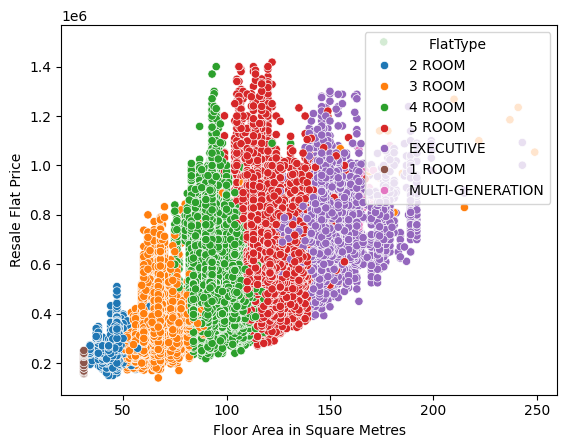

In [37]:
# Scatter Plot to visualise the relationship between the floor area ('FloorAreaSqm') and resale flat prices ('Price')
sns.scatterplot(data=df_final,x='FloorAreaSqm',y='Price', hue='FlatType')
plt.ylabel('Resale Flat Price')
plt.xlabel('Floor Area in Square Metres')
plt.show()

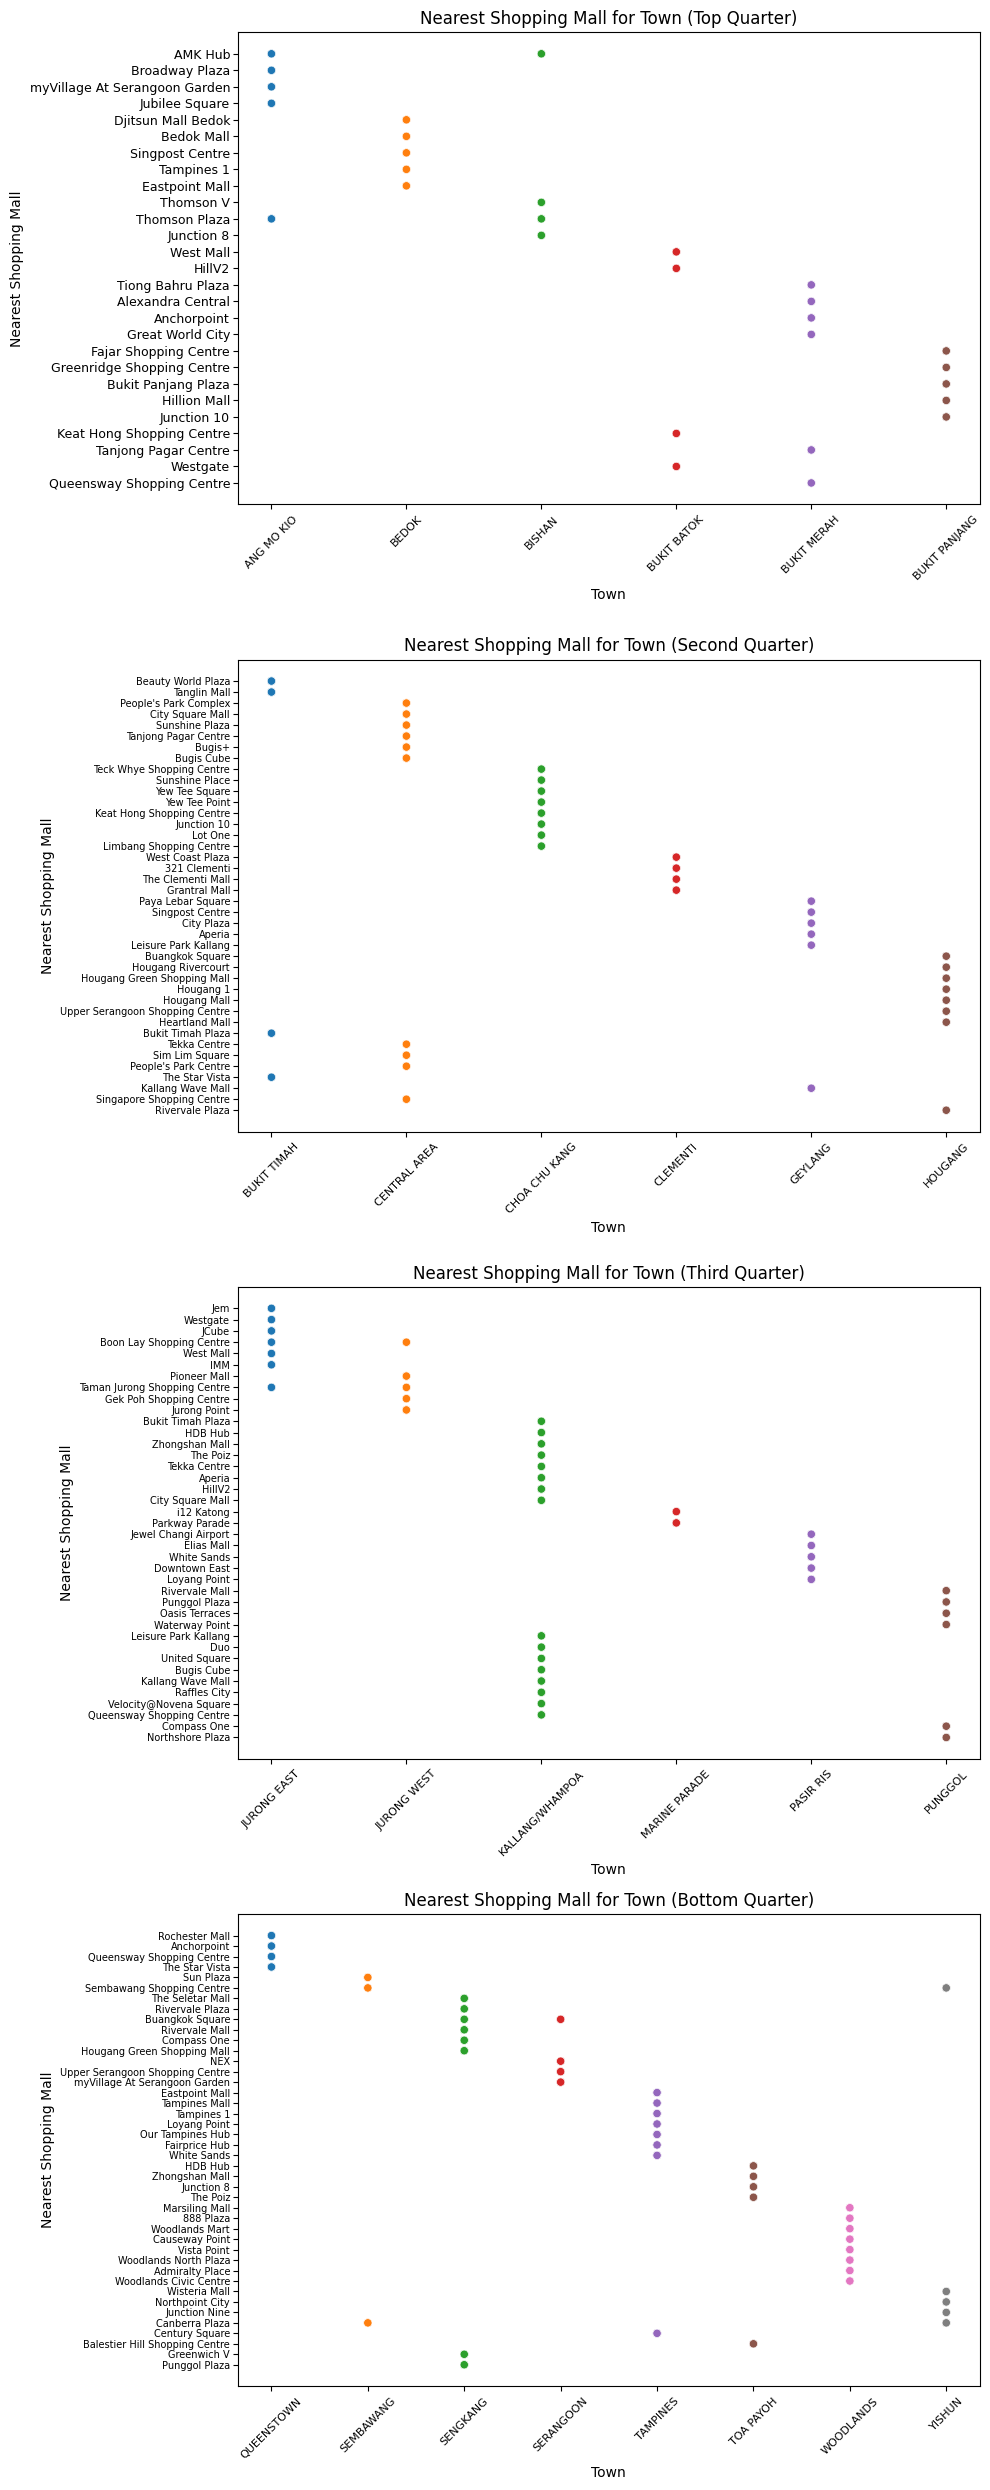

In [38]:
df_final['NearestShoppingMall'] = df_final['NearestShoppingMall'].astype(str)

# Get unique shopping malls for each town
unique_shopping_malls = df_final.groupby('Town')['NearestShoppingMall'].unique()

# Split unique shopping malls into quarters for better readability
quarter_point = len(unique_shopping_malls) // 4
top_quarter = unique_shopping_malls.iloc[:quarter_point]
second_quarter = unique_shopping_malls.iloc[quarter_point:2*quarter_point]
third_quarter = unique_shopping_malls.iloc[2*quarter_point:3*quarter_point]
bottom_quarter = unique_shopping_malls.iloc[3*quarter_point:]

# Create four separate plots
fig, axes = plt.subplots(4, 1, figsize=(10, 25))



# Plot top quarter
sns.scatterplot(data=df_final[df_final['Town'].isin(top_quarter.index)], x='Town', y='NearestShoppingMall', ax=axes[0], hue='Town', legend=False)
axes[0].set_xlabel('Town')
axes[0].set_ylabel('Nearest Shopping Mall')
axes[0].set_title('Nearest Shopping Mall for Town (Top Quarter)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=9, pad=2)

# Plot second quarter
sns.scatterplot(data=df_final[df_final['Town'].isin(second_quarter.index)], x='Town', y='NearestShoppingMall', ax=axes[1], hue='Town', legend=False)
axes[1].set_xlabel('Town')
axes[1].set_ylabel('Nearest Shopping Mall')
axes[1].set_title('Nearest Shopping Mall for Town (Second Quarter)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=7, pad=2)


# Plot third quarter
sns.scatterplot(data=df_final[df_final['Town'].isin(third_quarter.index)], x='Town', y='NearestShoppingMall', ax=axes[2], hue='Town', legend=False)
axes[2].set_xlabel('Town')
axes[2].set_ylabel('Nearest Shopping Mall')
axes[2].set_title('Nearest Shopping Mall for Town (Third Quarter)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].tick_params(axis='x', labelsize=8)
axes[2].tick_params(axis='y', labelsize=7, pad=2)

# Plot bottom quarter
sns.scatterplot(data=df_final[df_final['Town'].isin(bottom_quarter.index)], x='Town', y='NearestShoppingMall', ax=axes[3], hue='Town', legend=False)
axes[3].set_xlabel('Town')
axes[3].set_ylabel('Nearest Shopping Mall')
axes[3].set_title('Nearest Shopping Mall for Town (Bottom Quarter)')
axes[3].tick_params(axis='x', rotation=45)
axes[3].tick_params(axis='x', labelsize=8)
axes[3].tick_params(axis='y', labelsize=7, pad=2)

plt.subplots_adjust(hspace=0.1) 
plt.tight_layout()
plt.show()


The above Scatter plots show the distribution of the Nearest Shopping Malls with respect to the Town of each Resale Unit. It can be inferred that there are lesser shopping malls around Marine Parade and Sembawang. While there are more shopping malls near Kallang/Whampoa.

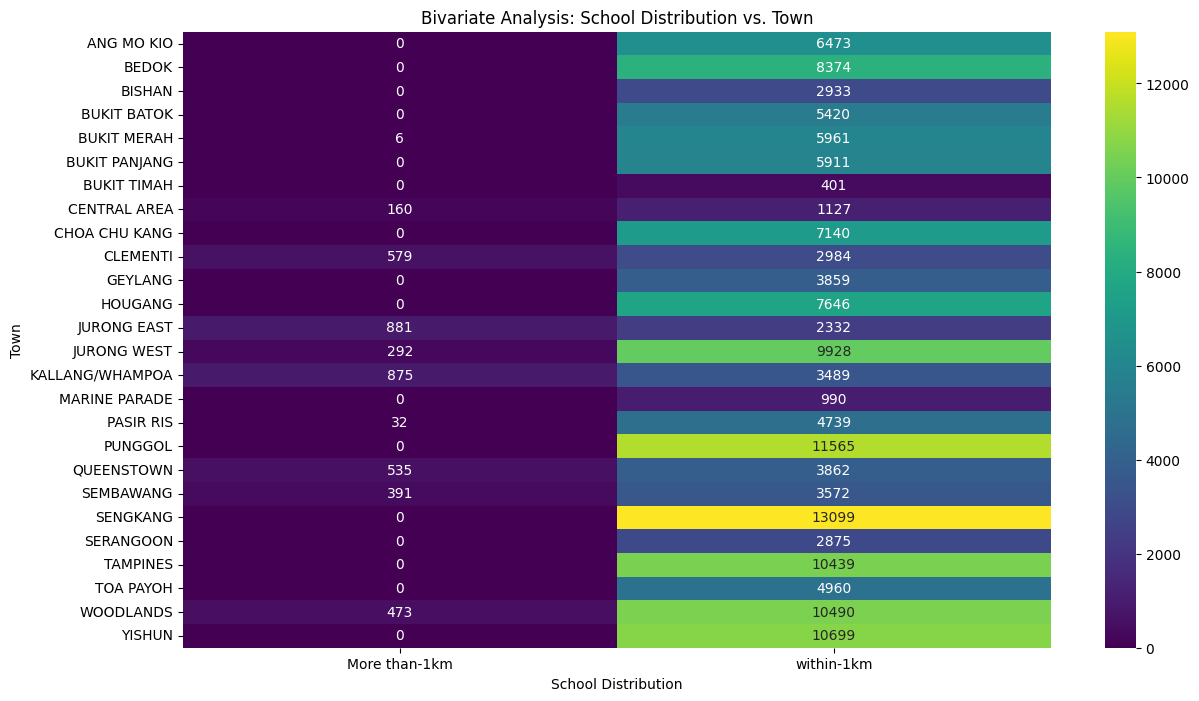

In [39]:
# Create a cross-tabulation of 'SchoolDistribution' and 'Town'
cross_tab = pd.crosstab(df_final['Town'], df_final['SchoolDistribution'])

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')

# Set plot title and labels
plt.title('Bivariate Analysis: School Distribution vs. Town')
plt.xlabel('School Distribution')
plt.ylabel('Town')

# Show the plot
plt.show()

61


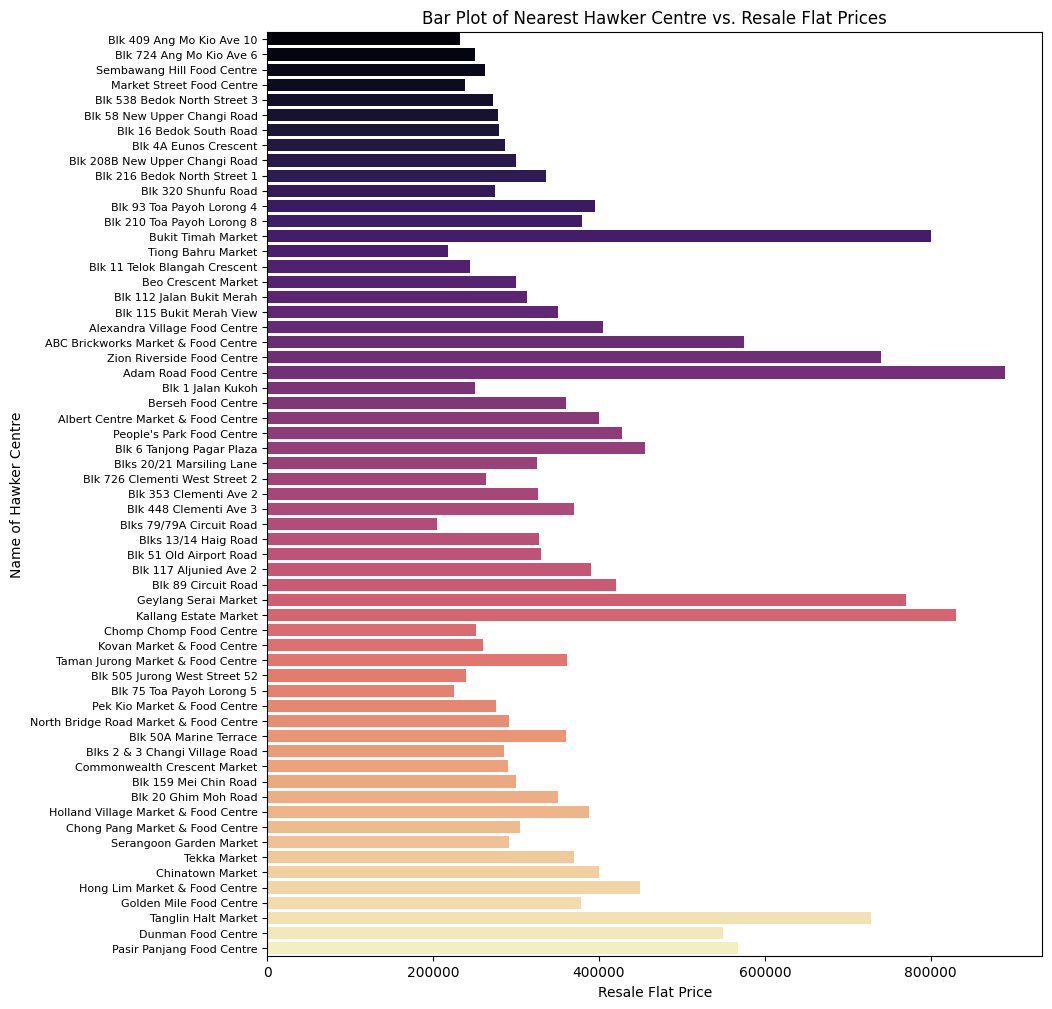

In [40]:
df_final_no_duplicates = df_final.drop_duplicates(subset=['NearestHawkerCentre'])
print(len(df_final_no_duplicates['NearestHawkerCentre']))

# Bar plot to visualise the relationship between Nearest Hawker Centre (categorical variable) & Resale flat prices (continous variable) :

plt.figure(figsize=(10, 12)) 

sns.barplot(x='Price',y=df_final_no_duplicates['NearestHawkerCentre'] ,data=df_final, palette='magma')
plt.title('Bar Plot of Nearest Hawker Centre vs. Resale Flat Prices')
plt.ylabel('Name of Hawker Centre')
plt.xlabel('Resale Flat Price')

plt.yticks(fontsize = 8)


plt.show()

This chart above gives us insights on the nearest hawker centre to the HDB property vs the resale flat price. As shown below, the HDBs closest to Adam Road Food Centre have resale transactions made for the highest resale flat price whereas HDBs closest to the Blks 79/79A Circuit Road hawker centres have the resale transactions made for the least resale flat price 

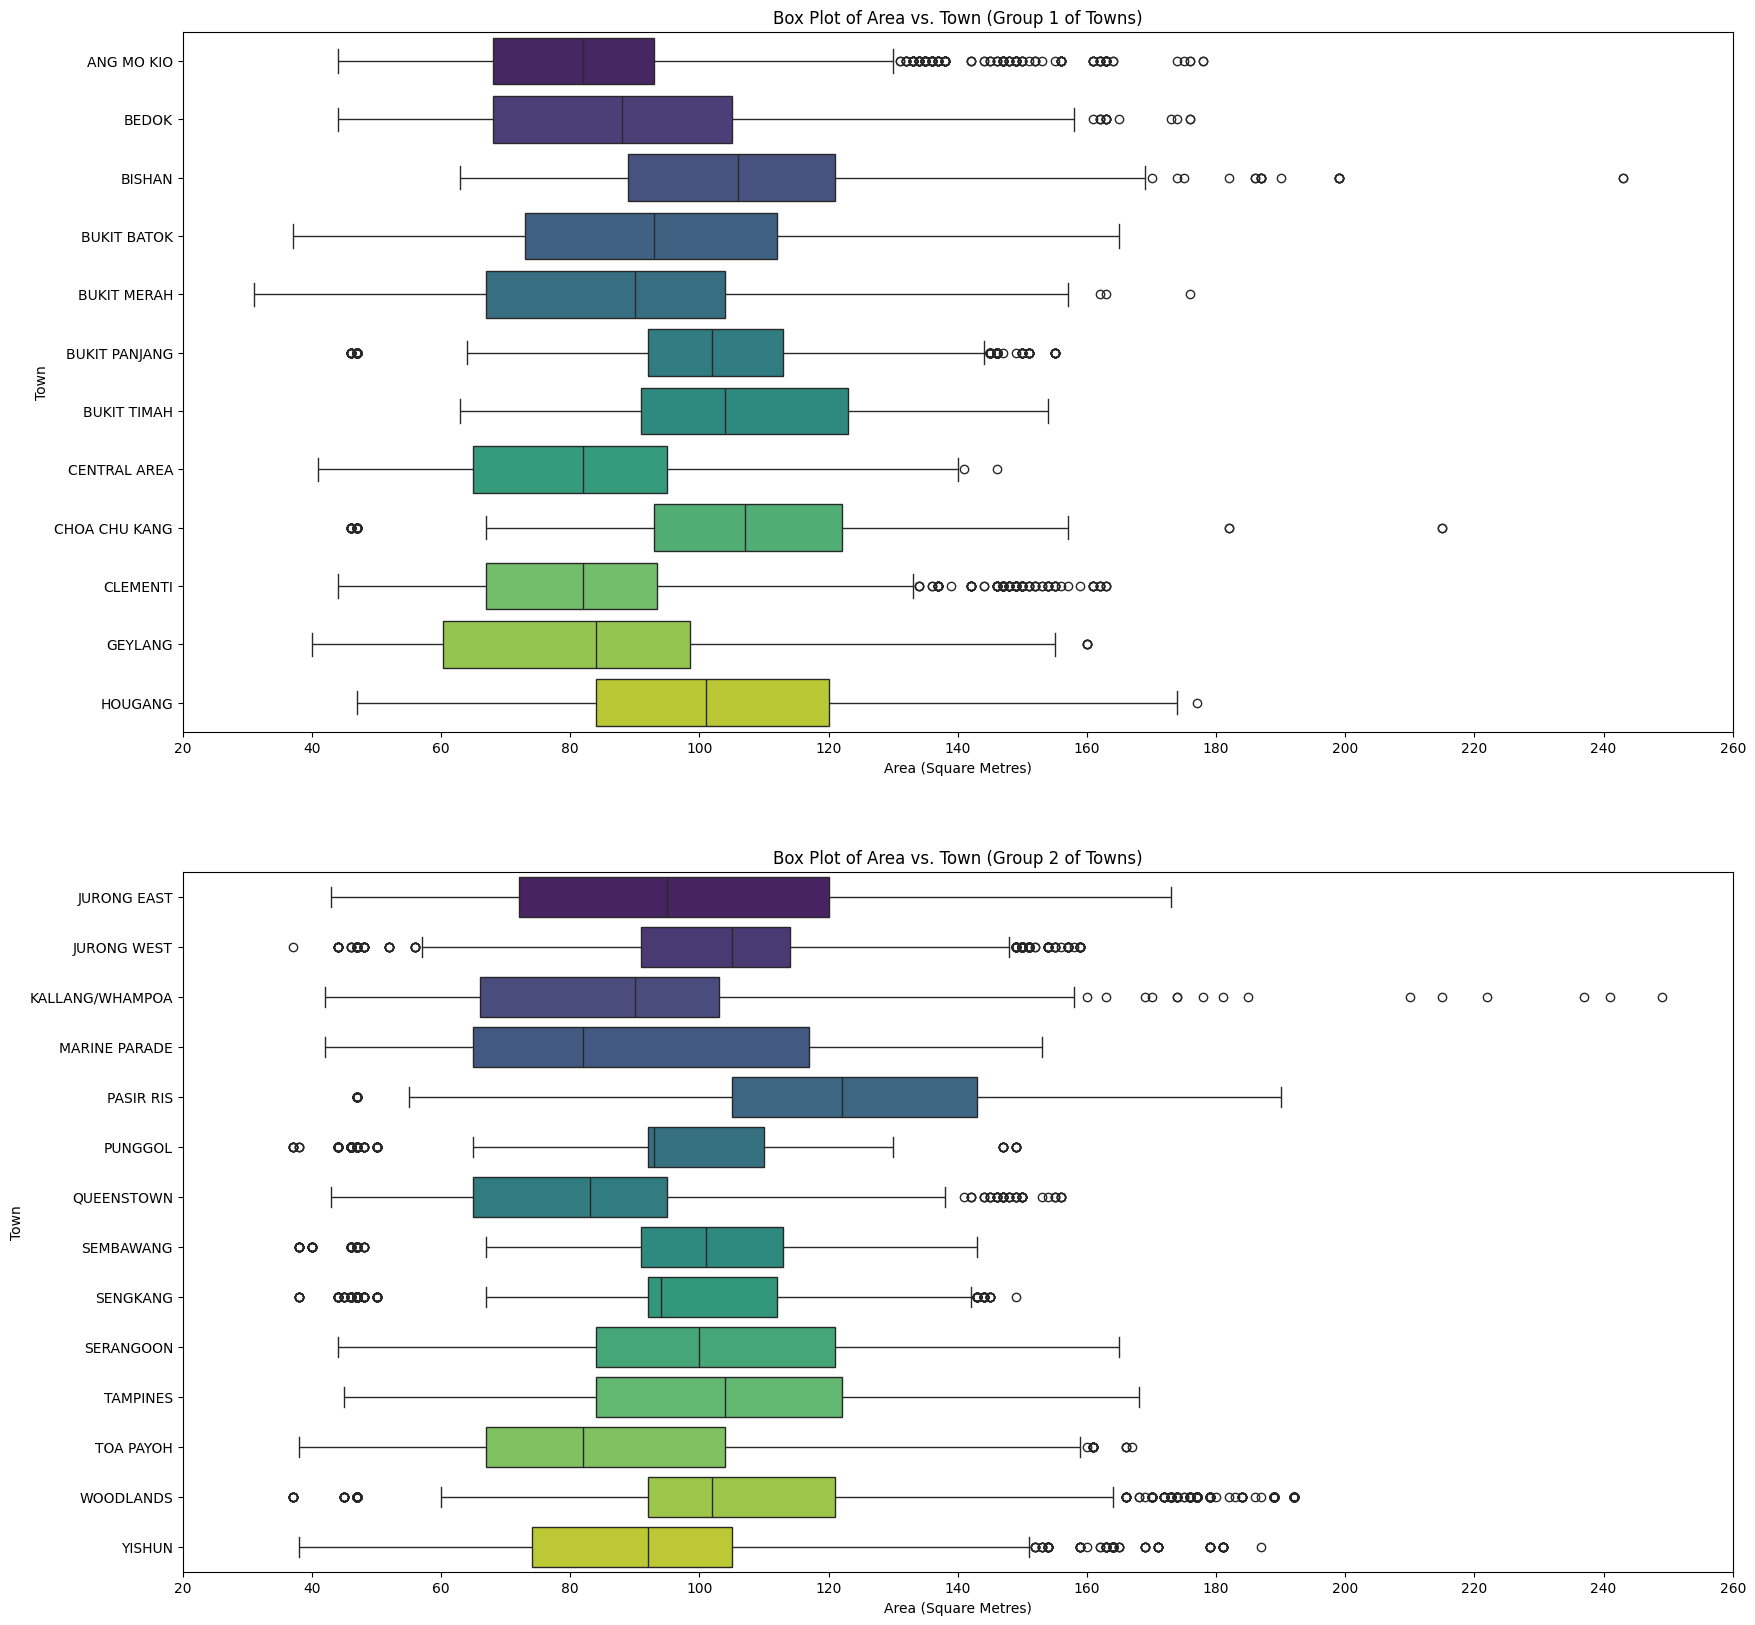

In [41]:
# Box Plot to compare floor area ('FloorAreaSqm') and town ('Town') - one categorical and one continuous variable
# To visualise how the floor areas of properties vary across different towns

# To determine tick positions
min_area = df_final['FloorAreaSqm'].min()
max_area = df_final['FloorAreaSqm'].max()
tick_positions = np.arange(20, max_area + 20, 20)

# Split towns into two groups for separate plots
towns_group1 = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG', 
                'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG', 'HOUGANG' ]
towns_group2 = ['JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS',
                'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH',
                'WOODLANDS', 'YISHUN']

fig, axes = plt.subplots(2, 1, figsize=(20, 20))

sns.boxplot(x='FloorAreaSqm', y='Town', data=df_final[df_final['Town'].isin(towns_group1)], palette='viridis', ax=axes[0])
axes[0].set_title('Box Plot of Area vs. Town (Group 1 of Towns)')
axes[0].set_xlabel('Area (Square Metres)')
axes[0].set_ylabel('Town')
axes[0].set_xticks(tick_positions)


sns.boxplot(x='FloorAreaSqm', y='Town', data=df_final[df_final['Town'].isin(towns_group2)], palette='viridis', ax=axes[1])
axes[1].set_title('Box Plot of Area vs. Town (Group 2 of Towns)')
axes[1].set_xlabel('Area (Square Metres)')
axes[1].set_ylabel('Town')
axes[1].set_xticks(tick_positions)


plt.show()


This plot above gives us insights on the average floor area of HDB properties each town has. As seen from the plot, HDB properties in Pasir Ris have a high floor area (of about 145sqm) as compared to other towns, and HDB properties in Geylang, Marine Parade, Queenstown and Toa Payoh have a smaller floor area (of about < 65sqm)

## 4. Data Preparation and Modelling 

### 4.1 Data Preparation

In [42]:
# split storey range start & end
storey_range_split = df_final['StoreyRange'].str.split(' TO ', expand=True)
 
df_final['StartStoreyRange'] = storey_range_split[0].astype(int)
df_final['EndStoreyRange'] = storey_range_split[1].astype(int)

df_final.head(3)

,Town,FlatType,Block,Street,StoreyRange,FloorAreaSqm,FlatModel,LeaseCommenceDate,RemainingLease,Price,...,HawkerCentreDistribution,NearestSchool,DistanceFromSchool,SchoolDistribution,NearestShoppingMall,DistanceFromShoppingMall,ShoppingMallDistribution,Region,StartStoreyRange,EndStoreyRange
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,...,within-1km,Townsville Primary School,0.218125,within-1km,AMK Hub,1.003018,More than-1km,Northeast,10,12
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,...,within-1km,Ang Mo Kio Primary School,0.241575,within-1km,Broadway Plaza,0.868861,within-1km,Northeast,1,3
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,...,More than-1km,Anderson Primary School,0.777157,within-1km,Broadway Plaza,1.525573,More than-1km,Northeast,1,3


In [43]:
# check what are the categorical and numerical features
categorical_features = df_final.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_final.select_dtypes(include=['int', 'float']).columns.tolist()

print("Categorical Features:")
for feature in categorical_features:
    print(feature)

print("\nNumerical Features:")
for feature in numerical_features:
    print(feature)

Categorical Features:
Town
FlatType
Block
Street
StoreyRange
FlatModel
RemainingLease
Address
MarketHawker
MultistoreyCarpark
NearestMRT
MRTDistribution
NearestHawkerCentre
HawkerCentreDistribution
NearestSchool
SchoolDistribution
NearestShoppingMall
ShoppingMallDistribution
Region

Numerical Features:
FloorAreaSqm
LeaseCommenceDate
Price
Year
Month
Latitude
Longitude
Postal
MaxFloorLevel
YearCompleted
TotalDwellingUnits
RemainingLeaseINT
StoreyRangeINT
DistanceFromMRT
DistanceFromHawkerCentre
DistanceFromSchool
DistanceFromShoppingMall
StartStoreyRange
EndStoreyRange


In [44]:
# see unique values for all categorical columns
for column in categorical_features:
    unique_values = df_final[column].unique()
    display(f"Unique values for {column}: {unique_values}")

"Unique values for Town: ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'\n 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'\n 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'\n 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'\n 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']"

"Unique values for FlatType: ['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'\n 'MULTI-GENERATION']"

"Unique values for Block: ['406' '108' '602' ... '362A' '366B' '362B']"

'Unique values for Street: [\'ANG MO KIO AVE 10\' \'ANG MO KIO AVE 4\' \'ANG MO KIO AVE 5\'\n \'ANG MO KIO AVE 1\' \'ANG MO KIO AVE 3\' \'ANG MO KIO AVE 9\'\n \'ANG MO KIO AVE 8\' \'ANG MO KIO AVE 6\' \'ANG MO KIO ST 52\'\n \'BEDOK NTH AVE 4\' \'BEDOK NTH AVE 1\' \'BEDOK NTH RD\' \'BEDOK STH AVE 1\'\n \'BEDOK RESERVOIR RD\' \'CHAI CHEE ST\' \'BEDOK NTH ST 3\' \'BEDOK STH RD\'\n \'CHAI CHEE AVE\' \'NEW UPP CHANGI RD\' \'CHAI CHEE DR\' \'BEDOK STH AVE 2\'\n \'BEDOK NTH AVE 3\' \'BEDOK RESERVOIR VIEW\' \'CHAI CHEE RD\' \'LENGKONG TIGA\'\n \'BEDOK CTRL\' \'JLN DAMAI\' \'BEDOK NTH AVE 2\' \'BEDOK STH AVE 3\'\n \'SIN MING RD\' \'SIN MING AVE\' \'BISHAN ST 12\' \'BISHAN ST 13\' \'BISHAN ST 22\'\n \'BISHAN ST 24\' \'BISHAN ST 23\' \'BRIGHT HILL DR\' \'SHUNFU RD\'\n \'BT BATOK ST 34\' \'BT BATOK ST 51\' \'BT BATOK ST 11\' \'BT BATOK ST 52\'\n \'BT BATOK ST 21\' \'BT BATOK EAST AVE 5\' \'BT BATOK WEST AVE 6\'\n \'BT BATOK CTRL\' \'BT BATOK WEST AVE 8\' \'BT BATOK EAST AVE 4\'\n \'BT BATOK ST 31\

"Unique values for StoreyRange: ['10 TO 12' '01 TO 03' '04 TO 06' '07 TO 09' '13 TO 15' '19 TO 21'\n '22 TO 24' '16 TO 18' '34 TO 36' '28 TO 30' '37 TO 39' '49 TO 51'\n '25 TO 27' '40 TO 42' '31 TO 33' '46 TO 48' '43 TO 45']"

"Unique values for FlatModel: ['Improved' 'New Generation' 'DBSS' 'Standard' 'Apartment' 'Simplified'\n 'Model A' 'Premium Apartment' 'Adjoined flat' 'Model A-Maisonette'\n 'Maisonette' 'Type S1' 'Type S2' 'Model A2' 'Terrace'\n 'Improved-Maisonette' 'Premium Maisonette' 'Multi Generation'\n 'Premium Apartment Loft' '2-room' '3Gen']"

"Unique values for RemainingLease: ['61 years 04 months' '60 years 07 months' '62 years 05 months'\n '62 years 01 month' '63 years' '61 years 06 months' '58 years 04 months'\n '59 years 08 months' '59 years 06 months' '60 years' '62 years 08 months'\n '61 years' '60 years 10 months' '59 years 03 months' '61 years 05 months'\n '60 years 04 months' '62 years' '60 years 03 months' '63 years 09 months'\n '61 years 01 month' '61 years 10 months' '58 years 06 months'\n '59 years 04 months' '62 years 11 months' '60 years 08 months'\n '93 years 08 months' '93 years 07 months' '60 years 01 month'\n '94 years 08 months' '78 years 04 months' '60 years 06 months'\n '62 years 06 months' '58 years' '70 years 08 months' '63 years 04 months'\n '63 years 06 months' '67 years 07 months' '61 years 07 months'\n '68 years 02 months' '68 years 03 months' '56 years' '67 years 09 months'\n '67 years 05 months' '63 years 07 months' '66 years 03 months'\n '65 years 04 months' '69 years 05 months' '59 years 11 m

"Unique values for Address: ['406 ANG MO KIO AVE 10' '108 ANG MO KIO AVE 4' '602 ANG MO KIO AVE 5' ...\n '362A SEMBAWANG CRES' '366B SEMBAWANG CRES' '362B SEMBAWANG CRES']"

"Unique values for MarketHawker: ['N' 'Y']"

"Unique values for MultistoreyCarpark: ['N' 'Y']"

"Unique values for NearestMRT: ['ANG MO KIO MRT STATION' 'YIO CHU KANG MRT STATION'\n 'BEDOK RESERVOIR MRT STATION' 'TANAH MERAH MRT STATION'\n 'BEDOK MRT STATION' 'KAKI BUKIT MRT STATION' 'BEDOK NORTH MRT STATION'\n 'KEMBANGAN MRT STATION' 'MARYMOUNT MRT STATION' 'BISHAN MRT STATION'\n 'BUKIT GOMBAK MRT STATION' 'BUKIT BATOK MRT STATION'\n 'TIONG BAHRU MRT STATION' 'TELOK BLANGAH MRT STATION'\n 'HARBOURFRONT MRT STATION' 'QUEENSTOWN MRT STATION' 'REDHILL MRT STATION'\n 'LABRADOR PARK MRT STATION' 'PENDING LRT STATION' 'BANGKIT LRT STATION'\n 'SEGAR LRT STATION' 'JELAPANG LRT STATION' 'PETIR LRT STATION'\n 'FAJAR LRT STATION' 'SENJA LRT STATION' 'BEAUTY WORLD MRT STATION'\n 'FARRER ROAD MRT STATION' 'CHINATOWN MRT STATION'\n 'JALAN BESAR MRT STATION' 'BENCOOLEN MRT STATION'\n 'TANJONG PAGAR MRT STATION' 'BUGIS MRT STATION' 'BRAS BASAH MRT STATION'\n 'OUTRAM PARK MRT STATION' 'TECK WHYE LRT STATION' 'KEAT HONG LRT STATION'\n 'SOUTH VIEW LRT STATION' 'YEW TEE MRT STATION'\n 'CHOA CHU KAN

"Unique values for MRTDistribution: ['More than-1km' 'within-1km']"

'Unique values for NearestHawkerCentre: [\'Blk 409 Ang Mo Kio Ave 10\' \'Blk 724 Ang Mo Kio Ave 6\'\n \'Sembawang Hill Food Centre\' \'Market Street Food Centre\'\n \'Blk 538 Bedok North Street 3\' \'Blk 58 New Upper Changi Road\'\n \'Blk 16 Bedok South Road\' \'Blk 4A Eunos Crescent\'\n \'Blk 208B New Upper Changi Road\' \'Blk 216 Bedok North Street 1\'\n \'Blk 320 Shunfu Road\' \'Blk 93 Toa Payoh Lorong 4\'\n \'Blk 210 Toa Payoh Lorong 8\' \'Bukit Timah Market\' \'Tiong Bahru Market\'\n \'Blk 11 Telok Blangah Crescent\' \'Beo Crescent Market\'\n \'Blk 112 Jalan Bukit Merah\' \'Blk 115 Bukit Merah View\'\n \'Alexandra Village Food Centre\' \'ABC Brickworks Market & Food Centre\'\n \'Zion Riverside Food Centre\' \'Adam Road Food Centre\' \'Blk 1 Jalan Kukoh\'\n \'Berseh Food Centre\' \'Albert Centre Market & Food Centre\'\n "People\'s Park Food Centre" \'Blk 6 Tanjong Pagar Plaza\'\n \'Blks 20/21 Marsiling Lane\' \'Blk 726 Clementi West Street 2\'\n \'Blk 353 Clementi Ave 2\' \'Blk 448

"Unique values for HawkerCentreDistribution: ['within-1km' 'More than-1km']"

'Unique values for NearestSchool: [\'Townsville Primary School\' \'Ang Mo Kio Primary School\'\n \'Anderson Primary School\' \'Teck Ghee Primary School\'\n \'Mayflower Primary School\' \'Jing Shan Primary School\'\n "St. Anthony\'s Primary School" \'Fengshan Primary School\'\n \'Bedok Green Primary School\' \'Yu Neng Primary School\'\n \'Telok Kurau Primary School\' \'Damai Primary School\'\n \'Opera Estate Primary School\' \'Red Swastika School\'\n "St. Stephen\'s School" \'Maha Bodhi School\' \'Temasek Primary School\'\n \'Catholic High School (Primary)\' \'Ai Tong School\'\n \'Kuo Chuan Presbyterian Primary School\' \'Lianhua Primary School\'\n \'Princess Elizabeth Primary School\' \'Dazhong Primary School\'\n \'Bukit View Primary School\' \'Keming Primary School\'\n \'Yuhua Primary School\' \'River Valley Primary School\'\n \'Zhangde Primary School\' \'Blangah Rise Primary School\'\n \'Alexandra Primary School\' \'Radin Mas Primary School\' \'CHIJ (Kellock)\'\n \'Queenstown Primary

"Unique values for SchoolDistribution: ['within-1km' 'More than-1km']"

'Unique values for NearestShoppingMall: [\'AMK Hub\' \'Broadway Plaza\' \'myVillage At Serangoon Garden\'\n \'Jubilee Square\' \'Djitsun Mall Bedok\' \'Bedok Mall\' \'Singpost Centre\'\n \'Tampines 1\' \'Eastpoint Mall\' \'Thomson V\' \'Thomson Plaza\' \'Junction 8\'\n \'West Mall\' \'HillV2\' \'Tiong Bahru Plaza\' \'Alexandra Central\'\n \'Anchorpoint\' \'Great World City\' \'Fajar Shopping Centre\'\n \'Greenridge Shopping Centre\' \'Bukit Panjang Plaza\' \'Hillion Mall\'\n \'Junction 10\' \'Beauty World Plaza\' \'Tanglin Mall\' "People\'s Park Complex"\n \'City Square Mall\' \'Sunshine Plaza\' \'Tanjong Pagar Centre\' \'Bugis+\'\n \'Bugis Cube\' \'Teck Whye Shopping Centre\' \'Sunshine Place\'\n \'Yew Tee Square\' \'Yew Tee Point\' \'Keat Hong Shopping Centre\' \'Lot One\'\n \'Limbang Shopping Centre\' \'West Coast Plaza\' \'321 Clementi\'\n \'The Clementi Mall\' \'Grantral Mall\' \'Paya Lebar Square\' \'City Plaza\'\n \'Aperia\' \'Leisure Park Kallang\' \'Buangkok Square\' \'Hougang

"Unique values for ShoppingMallDistribution: ['More than-1km' 'within-1km']"

"Unique values for Region: ['Northeast' 'East' 'Central' 'West' 'North']"

In [45]:
# list to store the categorical features
categorical_features = ['Town', 'FlatType', 'Block', 'Street', 'StoreyRange', 'FlatModel',
                        'RemainingLease', 'Address', 'MarketHawker', 'MultistoreyCarpark',
                        'NearestMRT', 'MRTDistribution', 'NearestHawkerCentre', 
                        'HawkerCentreDistribution', 'NearestSchool', 'SchoolDistribution',
                        'NearestShoppingMall', 'ShoppingMallDistribution']

# store the number of unique values for each feature
unique_values_dict = {}

# Calculate number of unique values for each categorical feature
for column in categorical_features:
    num_unique_values = df_final[column].nunique()
    unique_values_dict[column] = num_unique_values

# Sort the dictionary by values (number of unique values)
sorted_unique_values = sorted(unique_values_dict.items(), key=lambda x: x[1])


for feature, num_unique_values in sorted_unique_values:
    print(f"Number of unique values for {feature}: {num_unique_values}")

Number of unique values for MarketHawker: 2
Number of unique values for MultistoreyCarpark: 2
Number of unique values for MRTDistribution: 2
Number of unique values for HawkerCentreDistribution: 2
Number of unique values for SchoolDistribution: 2
Number of unique values for ShoppingMallDistribution: 2
Number of unique values for FlatType: 7
Number of unique values for StoreyRange: 17
Number of unique values for FlatModel: 21
Number of unique values for Town: 26
Number of unique values for NearestHawkerCentre: 61
Number of unique values for NearestShoppingMall: 114
Number of unique values for NearestMRT: 132
Number of unique values for NearestSchool: 166
Number of unique values for Street: 563
Number of unique values for RemainingLease: 664
Number of unique values for Block: 2664
Number of unique values for Address: 9436


In [46]:
# Count the number of values for each category in 'FlatType' and 'FlatModel'
flat_type_counts = df_final['FlatType'].value_counts()
flat_model_counts = df_final['FlatModel'].value_counts()

# Create a DataFrame to display the counts for flat type 
counts_df = pd.DataFrame({
    'FlatType': flat_type_counts.index,
    'Count': flat_type_counts.values,
})

# Create a DataFrame to display the counts for flat model
counts2_df = pd.DataFrame({
    'FlatModel': flat_model_counts.index,
    'Count': flat_model_counts.values,
})

print(counts_df)
print("\n")
print(counts2_df)


           FlatType  Count
0            4 ROOM  65259
1            5 ROOM  39222
2            3 ROOM  36486
3         EXECUTIVE  11908
4            2 ROOM   2484
5  MULTI-GENERATION     72
6            1 ROOM     61


                 FlatModel  Count
0                  Model A  52858
1                 Improved  38535
2           New Generation  19426
3        Premium Apartment  17864
4               Simplified   6055
5                Apartment   5974
6               Maisonette   4532
7                 Standard   4355
8                     DBSS   2760
9                 Model A2   1790
10      Model A-Maisonette    286
11                 Type S1    276
12           Adjoined flat    275
13                 Type S2    152
14  Premium Apartment Loft     95
15                 Terrace     90
16        Multi Generation     72
17                  2-room     49
18     Improved-Maisonette     22
19      Premium Maisonette     14
20                    3Gen     12


In [47]:
# remove multi-gen & 1 room flat type since little to no occurences in the dataset
df_final  = df_final[~df_final['FlatType'].isin(['MULTI-GENERATION', '1 ROOM'])]
df_final['FlatType'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE'], dtype=object)

In [48]:
# remove threshold < 30 for flat model since little to no occurences in the dataset
df_final  = df_final[~df_final['FlatModel'].isin(['Premium Masionette', 'Improved-Masionette', '3Gen'])]
df_final['FlatModel'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Premium Apartment Loft', '2-room'], dtype=object)

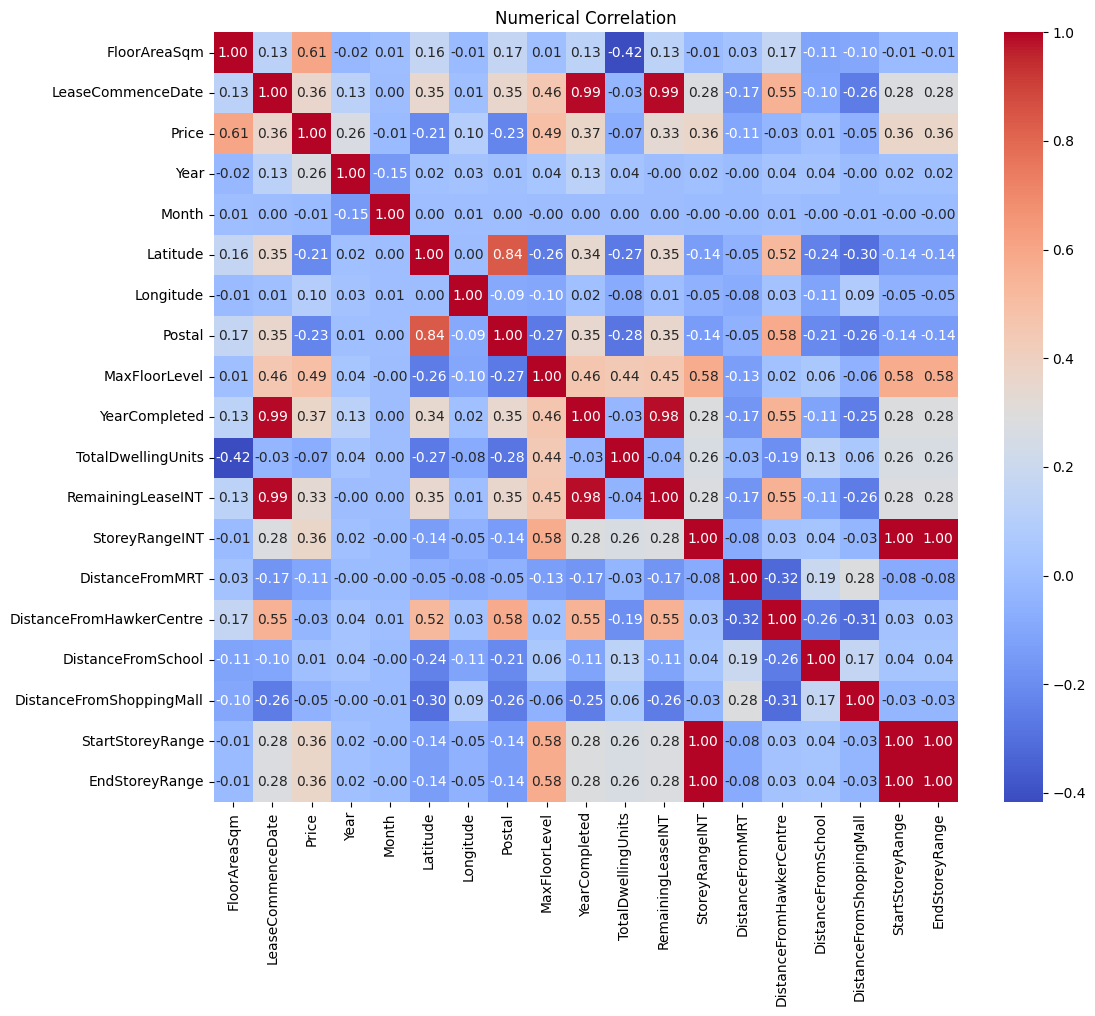

Correlation of all columns with respect to Price (descending order):
Price                       1.000000
FloorAreaSqm                0.606781
MaxFloorLevel               0.490787
YearCompleted               0.365937
EndStoreyRange              0.364385
StoreyRangeINT              0.364385
StartStoreyRange            0.364385
LeaseCommenceDate           0.362954
RemainingLeaseINT           0.330720
Year                        0.264346
Longitude                   0.098163
DistanceFromSchool          0.010369
Month                      -0.011272
DistanceFromHawkerCentre   -0.033245
DistanceFromShoppingMall   -0.054090
TotalDwellingUnits         -0.070134
DistanceFromMRT            -0.105529
Latitude                   -0.209885
Postal                     -0.226111
Name: Price, dtype: float64


In [49]:
# correlation between numerical variables 
numerical_columns = df_final.select_dtypes(include=['float64', 'int64', 'int32']).columns
 
numerical_corr = df_final[numerical_columns].corr()
 
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Correlation')
plt.show()
 
price_corr = numerical_corr['Price']
price_corr_sorted = price_corr.sort_values(ascending=False)
 
print("Correlation of all columns with respect to Price (descending order):")
print(price_corr_sorted)

#### One-Hot encoding to transform categorical variables into numerical 

<b>Variables to one-hot encode</b>: Town, FlatType, FlatModel <br></br>
<b>Reason</b>: From number of unique values seen for each variable, those 3 features have the least number of categories

##### One-hot encoding for FlatType

In [50]:
# One hot encoding for the column 'FlatType'
df_final = pd.get_dummies(df_final, columns=['FlatType'], prefix='FlatType')
print(df_final.columns)

Index(['Town', 'Block', 'Street', 'StoreyRange', 'FloorAreaSqm', 'FlatModel',
       'LeaseCommenceDate', 'RemainingLease', 'Price', 'Year', 'Month',
       'Address', 'Latitude', 'Longitude', 'Postal', 'MaxFloorLevel',
       'YearCompleted', 'MarketHawker', 'MultistoreyCarpark',
       'TotalDwellingUnits', 'RemainingLeaseINT', 'StoreyRangeINT',
       'NearestMRT', 'DistanceFromMRT', 'MRTDistribution',
       'NearestHawkerCentre', 'DistanceFromHawkerCentre',
       'HawkerCentreDistribution', 'NearestSchool', 'DistanceFromSchool',
       'SchoolDistribution', 'NearestShoppingMall', 'DistanceFromShoppingMall',
       'ShoppingMallDistribution', 'Region', 'StartStoreyRange',
       'EndStoreyRange', 'FlatType_2 ROOM', 'FlatType_3 ROOM',
       'FlatType_4 ROOM', 'FlatType_5 ROOM', 'FlatType_EXECUTIVE'],
      dtype='object')


##### One-hot encoding for FlatModel

In [51]:
# One hot encoding for the column 'FlatModel'
df_final = pd.get_dummies(df_final, columns=['FlatModel'], prefix='FlatModel')
print(df_final.columns)

Index(['Town', 'Block', 'Street', 'StoreyRange', 'FloorAreaSqm',
       'LeaseCommenceDate', 'RemainingLease', 'Price', 'Year', 'Month',
       'Address', 'Latitude', 'Longitude', 'Postal', 'MaxFloorLevel',
       'YearCompleted', 'MarketHawker', 'MultistoreyCarpark',
       'TotalDwellingUnits', 'RemainingLeaseINT', 'StoreyRangeINT',
       'NearestMRT', 'DistanceFromMRT', 'MRTDistribution',
       'NearestHawkerCentre', 'DistanceFromHawkerCentre',
       'HawkerCentreDistribution', 'NearestSchool', 'DistanceFromSchool',
       'SchoolDistribution', 'NearestShoppingMall', 'DistanceFromShoppingMall',
       'ShoppingMallDistribution', 'Region', 'StartStoreyRange',
       'EndStoreyRange', 'FlatType_2 ROOM', 'FlatType_3 ROOM',
       'FlatType_4 ROOM', 'FlatType_5 ROOM', 'FlatType_EXECUTIVE',
       'FlatModel_2-room', 'FlatModel_Adjoined flat', 'FlatModel_Apartment',
       'FlatModel_DBSS', 'FlatModel_Improved', 'FlatModel_Improved-Maisonette',
       'FlatModel_Maisonette', 'FlatMode

##### One-hot encoding for Town

In [52]:
# One hot encoding for the column 'Town'
df_final = pd.get_dummies(df_final, columns=['Town'], prefix='Town')
print(df_final.columns)

Index(['Block', 'Street', 'StoreyRange', 'FloorAreaSqm', 'LeaseCommenceDate',
       'RemainingLease', 'Price', 'Year', 'Month', 'Address', 'Latitude',
       'Longitude', 'Postal', 'MaxFloorLevel', 'YearCompleted', 'MarketHawker',
       'MultistoreyCarpark', 'TotalDwellingUnits', 'RemainingLeaseINT',
       'StoreyRangeINT', 'NearestMRT', 'DistanceFromMRT', 'MRTDistribution',
       'NearestHawkerCentre', 'DistanceFromHawkerCentre',
       'HawkerCentreDistribution', 'NearestSchool', 'DistanceFromSchool',
       'SchoolDistribution', 'NearestShoppingMall', 'DistanceFromShoppingMall',
       'ShoppingMallDistribution', 'Region', 'StartStoreyRange',
       'EndStoreyRange', 'FlatType_2 ROOM', 'FlatType_3 ROOM',
       'FlatType_4 ROOM', 'FlatType_5 ROOM', 'FlatType_EXECUTIVE',
       'FlatModel_2-room', 'FlatModel_Adjoined flat', 'FlatModel_Apartment',
       'FlatModel_DBSS', 'FlatModel_Improved', 'FlatModel_Improved-Maisonette',
       'FlatModel_Maisonette', 'FlatModel_Model A',
   

In [53]:
# variables to be converted from bool to int
bool_variables = [
    'FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM', 'FlatType_5 ROOM', 'FlatType_EXECUTIVE', 
    'FlatModel_2-room', 'FlatModel_Adjoined flat', 'FlatModel_Apartment', 'FlatModel_DBSS', 
    'FlatModel_Improved', 'FlatModel_Improved-Maisonette', 'FlatModel_Maisonette', 'FlatModel_Model A', 
    'FlatModel_Model A-Maisonette', 'FlatModel_Model A2', 'FlatModel_New Generation', 
    'FlatModel_Premium Apartment', 'FlatModel_Premium Apartment Loft', 'FlatModel_Premium Maisonette', 
    'FlatModel_Simplified', 'FlatModel_Standard', 'FlatModel_Terrace', 'FlatModel_Type S1', 
    'FlatModel_Type S2', 'Town_ANG MO KIO', 'Town_BEDOK', 'Town_BISHAN', 'Town_BUKIT BATOK', 
    'Town_BUKIT MERAH', 'Town_BUKIT PANJANG', 'Town_BUKIT TIMAH', 'Town_CENTRAL AREA', 
    'Town_CHOA CHU KANG', 'Town_CLEMENTI', 'Town_GEYLANG', 'Town_HOUGANG', 'Town_JURONG EAST', 
    'Town_JURONG WEST', 'Town_KALLANG/WHAMPOA', 'Town_MARINE PARADE', 'Town_PASIR RIS', 'Town_PUNGGOL', 
    'Town_QUEENSTOWN', 'Town_SEMBAWANG', 'Town_SENGKANG', 'Town_SERANGOON', 'Town_TAMPINES', 
    'Town_TOA PAYOH', 'Town_WOODLANDS', 'Town_YISHUN'
]

for var in bool_variables:
    df_final[var] = df_final[var].astype(int)

df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 155347 entries, 0 to 155820
Data columns (total 85 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Block                             155347 non-null  object 
 1   Street                            155347 non-null  object 
 2   StoreyRange                       155347 non-null  object 
 3   FloorAreaSqm                      155347 non-null  float64
 4   LeaseCommenceDate                 155347 non-null  int64  
 5   RemainingLease                    155347 non-null  object 
 6   Price                             155347 non-null  float64
 7   Year                              155347 non-null  int64  
 8   Month                             155347 non-null  int64  
 9   Address                           155347 non-null  object 
 10  Latitude                          155347 non-null  float64
 11  Longitude                         155347 non-null  float6

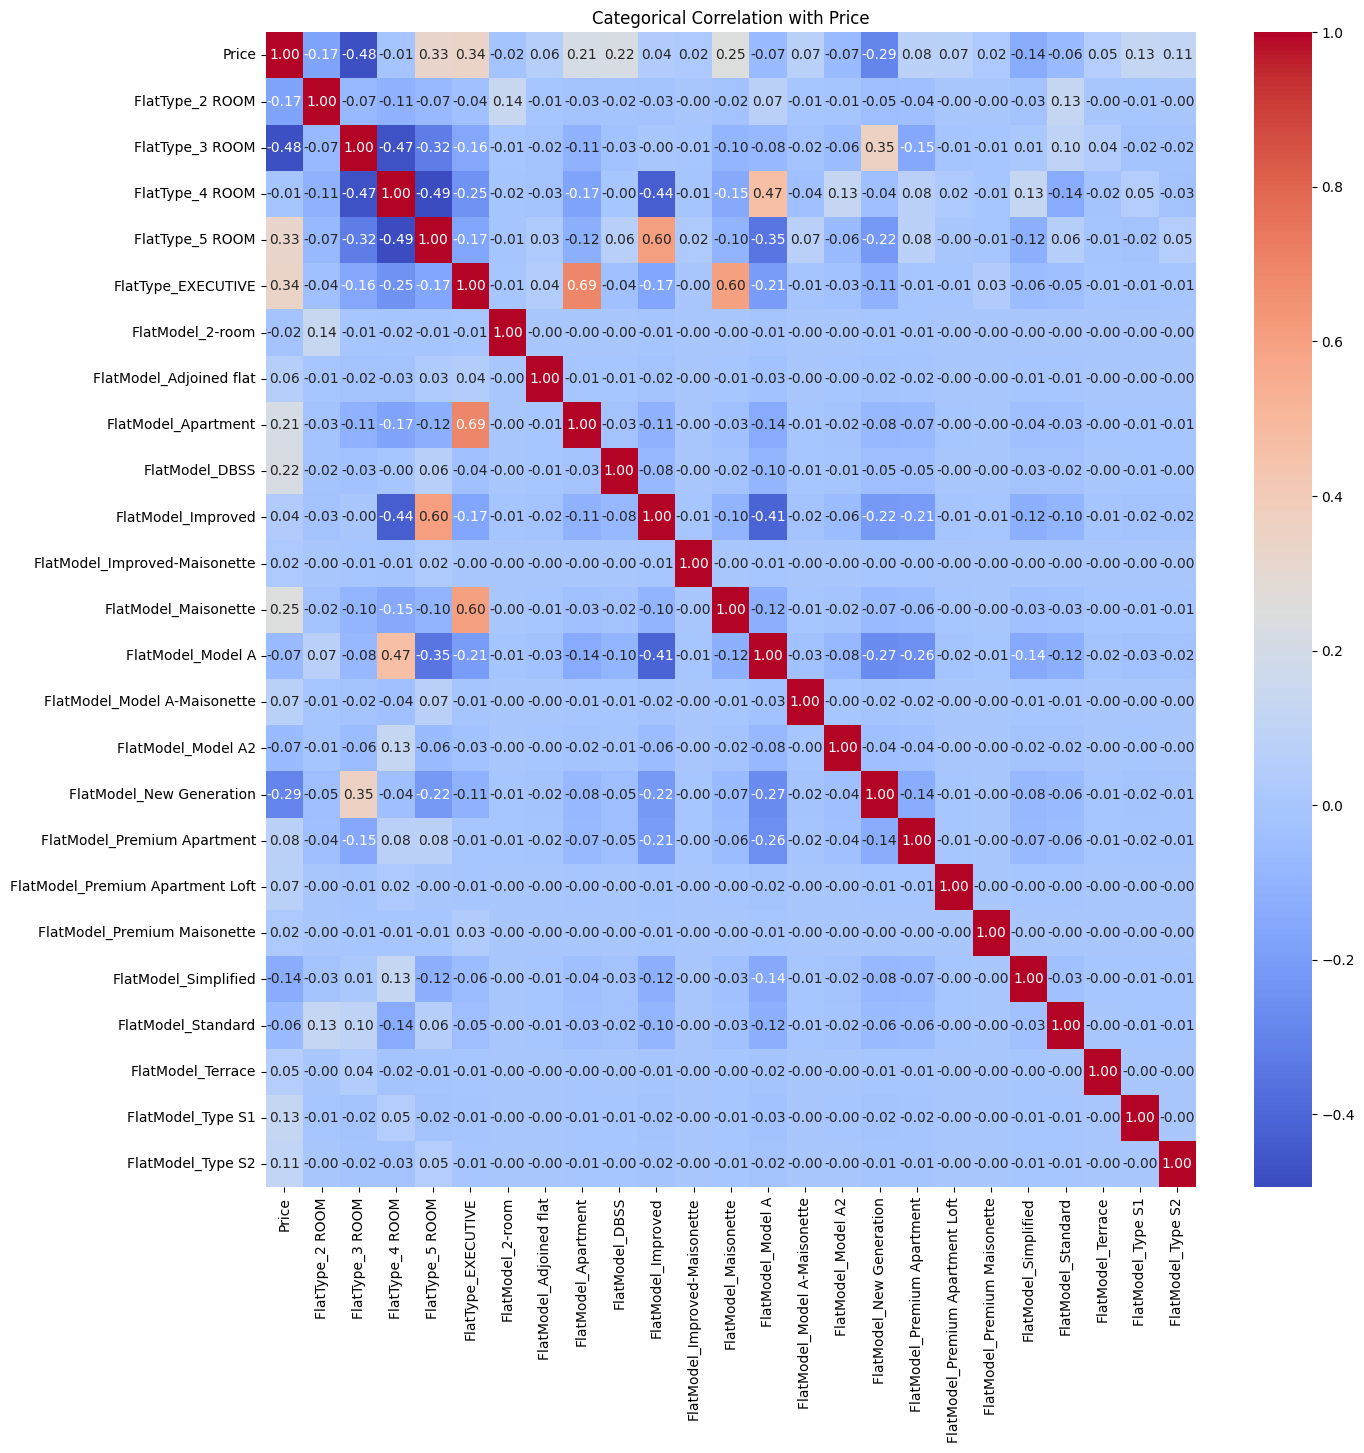

Correlation of all columns with respect to Price (descending order):
Price                               1.000000
FlatType_EXECUTIVE                  0.336320
FlatType_5 ROOM                     0.327673
FlatModel_Maisonette                0.251378
FlatModel_DBSS                      0.221369
FlatModel_Apartment                 0.213272
FlatModel_Type S1                   0.127393
FlatModel_Type S2                   0.114875
FlatModel_Premium Apartment         0.083341
FlatModel_Model A-Maisonette        0.068674
FlatModel_Premium Apartment Loft    0.068502
FlatModel_Adjoined flat             0.057209
FlatModel_Terrace                   0.053362
FlatModel_Improved                  0.035689
FlatModel_Premium Maisonette        0.016819
FlatModel_Improved-Maisonette       0.015626
FlatType_4 ROOM                    -0.013789
FlatModel_2-room                   -0.019871
FlatModel_Standard                 -0.064671
FlatModel_Model A                  -0.065095
FlatModel_Model A2             

In [54]:
# correlation between categorical variables (Flat Types and Flat Models)

columns_of_interest = ['FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM', 'FlatType_5 ROOM', 'FlatType_EXECUTIVE', 
                       'FlatModel_2-room', 'FlatModel_Adjoined flat', 'FlatModel_Apartment', 'FlatModel_DBSS', 
                       'FlatModel_Improved', 'FlatModel_Improved-Maisonette', 'FlatModel_Maisonette', 'FlatModel_Model A', 
                       'FlatModel_Model A-Maisonette', 'FlatModel_Model A2', 'FlatModel_New Generation', 
                       'FlatModel_Premium Apartment', 'FlatModel_Premium Apartment Loft', 'FlatModel_Premium Maisonette', 
                       'FlatModel_Simplified', 'FlatModel_Standard', 'FlatModel_Terrace', 'FlatModel_Type S1', 
                       'FlatModel_Type S2']

subset_df = df_final[['Price'] + columns_of_interest]


numerical_corr = subset_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Categorical Correlation with Price')
plt.show()

price_corr = numerical_corr['Price']
price_corr_sorted = price_corr.sort_values(ascending=False)
print("Correlation of all columns with respect to Price (descending order):")
print(price_corr_sorted)


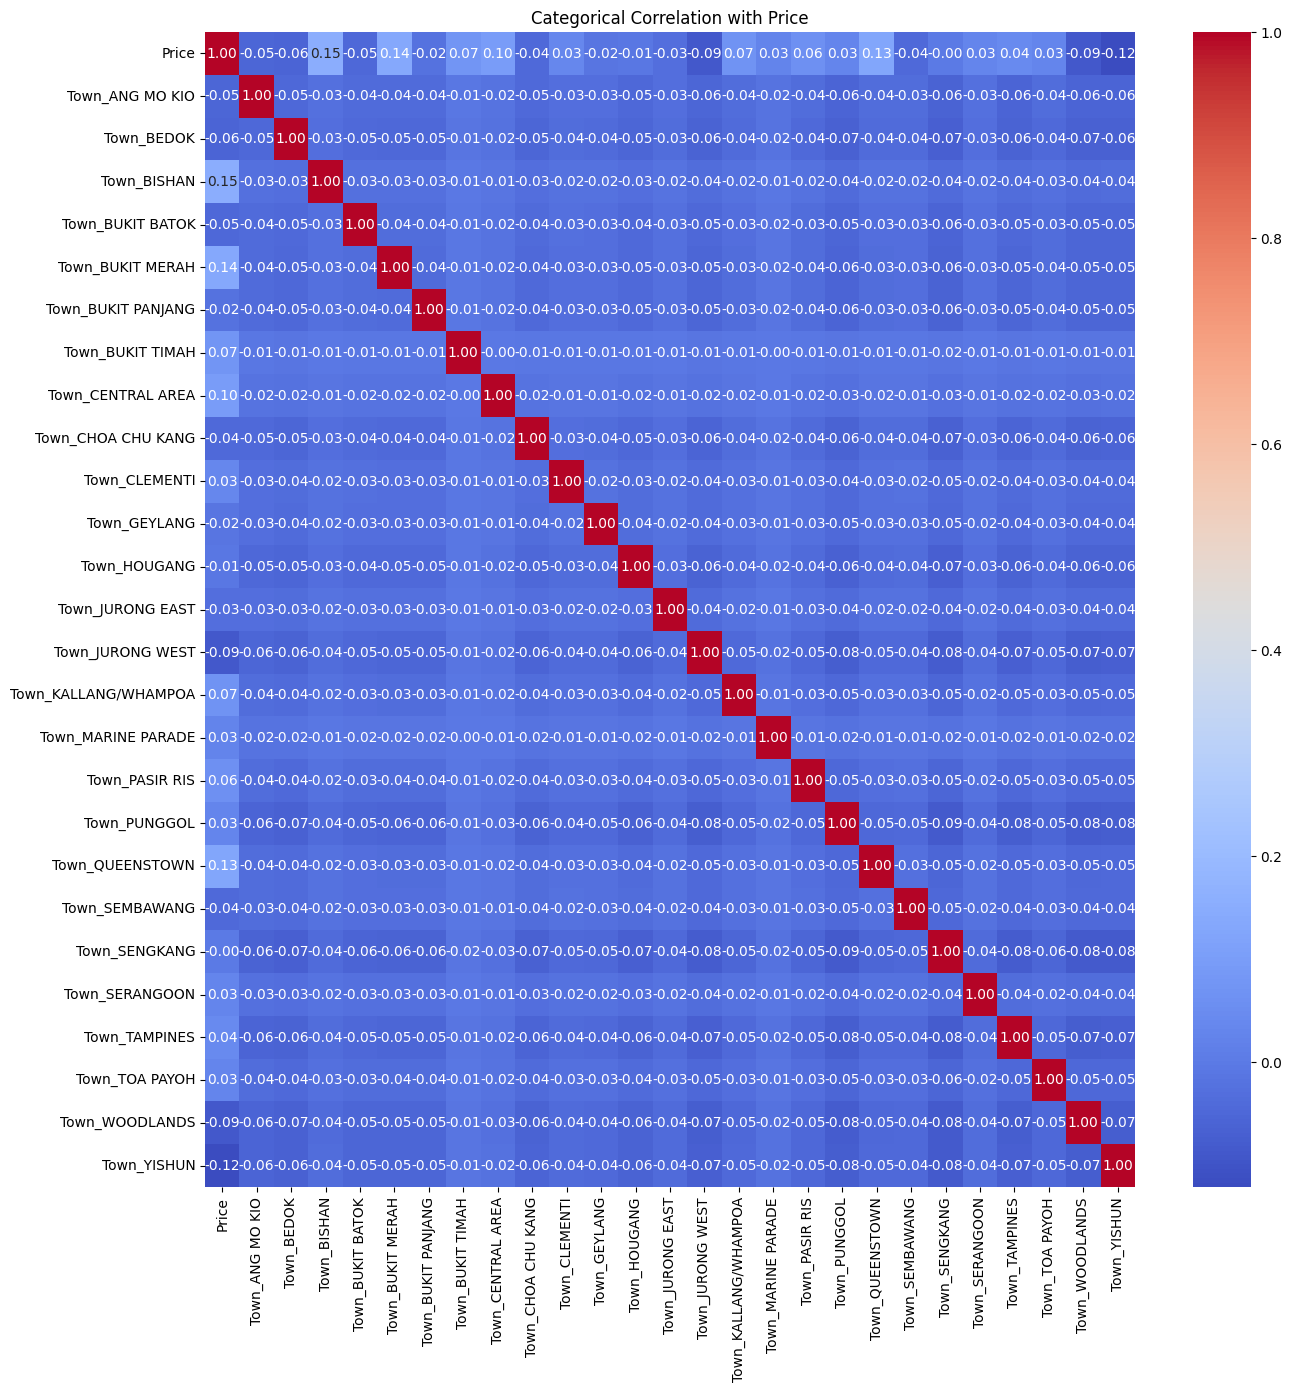

Correlation of all columns with respect to Price (descending order):
Price                   1.000000
Town_BISHAN             0.151266
Town_BUKIT MERAH        0.136751
Town_QUEENSTOWN         0.125285
Town_CENTRAL AREA       0.096471
Town_BUKIT TIMAH        0.072586
Town_KALLANG/WHAMPOA    0.070884
Town_PASIR RIS          0.061054
Town_TAMPINES           0.042688
Town_CLEMENTI           0.032479
Town_TOA PAYOH          0.031916
Town_SERANGOON          0.030848
Town_PUNGGOL            0.028505
Town_MARINE PARADE      0.026339
Town_SENGKANG          -0.002146
Town_HOUGANG           -0.007949
Town_GEYLANG           -0.016149
Town_BUKIT PANJANG     -0.023269
Town_JURONG EAST       -0.033500
Town_CHOA CHU KANG     -0.043340
Town_SEMBAWANG         -0.043930
Town_BUKIT BATOK       -0.048388
Town_ANG MO KIO        -0.052879
Town_BEDOK             -0.055943
Town_WOODLANDS         -0.086926
Town_JURONG WEST       -0.088722
Town_YISHUN            -0.121274
Name: Price, dtype: float64


In [55]:
# correlation between categorical variables (Towns)

columns_of_interest = ['Town_ANG MO KIO', 'Town_BEDOK', 'Town_BISHAN', 'Town_BUKIT BATOK', 
                       'Town_BUKIT MERAH', 'Town_BUKIT PANJANG', 'Town_BUKIT TIMAH', 'Town_CENTRAL AREA', 
                       'Town_CHOA CHU KANG', 'Town_CLEMENTI', 'Town_GEYLANG', 'Town_HOUGANG', 'Town_JURONG EAST', 
                       'Town_JURONG WEST', 'Town_KALLANG/WHAMPOA', 'Town_MARINE PARADE', 'Town_PASIR RIS', 'Town_PUNGGOL', 
                       'Town_QUEENSTOWN', 'Town_SEMBAWANG', 'Town_SENGKANG', 'Town_SERANGOON', 'Town_TAMPINES', 
                       'Town_TOA PAYOH', 'Town_WOODLANDS', 'Town_YISHUN']

subset_df = df_final[['Price'] + columns_of_interest]


numerical_corr = subset_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Categorical Correlation with Price')
plt.show()

price_corr = numerical_corr['Price']
price_corr_sorted = price_corr.sort_values(ascending=False)
print("Correlation of all columns with respect to Price (descending order):")
print(price_corr_sorted)


In [56]:
from sklearn.feature_selection import f_classif

target_variable = 'Price'

categorical_features = df_final[
    ['FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM', 'FlatType_5 ROOM', 'FlatType_EXECUTIVE', 
    'FlatModel_2-room', 'FlatModel_Adjoined flat', 'FlatModel_Apartment', 'FlatModel_DBSS', 
    'FlatModel_Improved', 'FlatModel_Improved-Maisonette', 'FlatModel_Maisonette', 'FlatModel_Model A', 
    'FlatModel_Model A-Maisonette', 'FlatModel_Model A2', 'FlatModel_New Generation', 
    'FlatModel_Premium Apartment', 'FlatModel_Premium Apartment Loft', 'FlatModel_Premium Maisonette', 
    'FlatModel_Simplified', 'FlatModel_Standard', 'FlatModel_Terrace', 'FlatModel_Type S1', 
    'FlatModel_Type S2', 'Town_ANG MO KIO', 'Town_BEDOK', 'Town_BISHAN', 'Town_BUKIT BATOK', 
    'Town_BUKIT MERAH', 'Town_BUKIT PANJANG', 'Town_BUKIT TIMAH', 'Town_CENTRAL AREA', 
    'Town_CHOA CHU KANG', 'Town_CLEMENTI', 'Town_GEYLANG', 'Town_HOUGANG', 'Town_JURONG EAST', 
    'Town_JURONG WEST', 'Town_KALLANG/WHAMPOA', 'Town_MARINE PARADE', 'Town_PASIR RIS', 'Town_PUNGGOL', 
    'Town_QUEENSTOWN', 'Town_SEMBAWANG', 'Town_SENGKANG', 'Town_SERANGOON', 'Town_TAMPINES', 
    'Town_TOA PAYOH', 'Town_WOODLANDS', 'Town_YISHUN'
]]

f_scores, p_values = f_classif(categorical_features, df_final[target_variable])

anova_results = pd.DataFrame({'Feature': categorical_features.columns, 'F-score': f_scores, 'P-value': p_values})

anova_results.sort_values(by='F-score', ascending=True, inplace=True)

print("ANOVA test results for categorical features affecting Price:")
print(anova_results)


ANOVA test results for categorical features affecting Price:
                             Feature    F-score        P-value
5                   FlatModel_2-room   0.248098   1.000000e+00
10     FlatModel_Improved-Maisonette   0.332144   1.000000e+00
18      FlatModel_Premium Maisonette   0.519423   1.000000e+00
36                  Town_JURONG EAST   0.905378   9.999741e-01
35                      Town_HOUGANG   0.936158   9.965089e-01
45                    Town_SERANGOON   1.022802   1.722479e-01
29                Town_BUKIT PANJANG   1.115198   2.057235e-06
43                    Town_SEMBAWANG   1.179154   1.107694e-12
32                Town_CHOA CHU KANG   1.202076   1.859166e-15
46                     Town_TAMPINES   1.262911   4.488737e-24
48                    Town_WOODLANDS   1.282310   3.483366e-27
6            FlatModel_Adjoined flat   1.344836   2.572313e-38
14                FlatModel_Model A2   1.345189   2.202338e-38
27                  Town_BUKIT BATOK   1.353591   5.28307

Understand the F-statistics

Larger F-value: A larger F-value indicates a greater difference among the group means. It suggests that the variations between the groups are significant.
Smaller F-value: Conversely, a smaller F-value suggests that the group means are similar, and there may not be significant differences among them.

Examine the P-Value


P-Value < Significance Level (e.g., 0.05): If the p-value is less than your chosen significance level (often set at 0.05), it indicates that there are statistically significant differences among the groups. In other words, you have evidence to reject the null hypothesis, which assumes no significant differences.
P-Value ≥ Significance Level: If the p-value is equal to or greater than the chosen significance level, you do not have enough evidence to reject the null hypothesis. This suggests that any observed differences are likely due to random chance.

https://surveysparrow.com/blog/anova/

##### Standardization - Feature scaling :

Preprocessing step that involves transforming the data such that it has a mean of 0 and a standard deviation of 1. Ensures all the input features contribute proportionately.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the input and target features :

X = df_final[['FloorAreaSqm', 'LeaseCommenceDate', 'Price', 'Year', 'Month',
       'Latitude', 'Longitude', 'Postal', 'MaxFloorLevel', 'YearCompleted',
       'TotalDwellingUnits', 'RemainingLeaseINT', 'StoreyRangeINT',
       'DistanceFromMRT', 'DistanceFromHawkerCentre', 'DistanceFromSchool',
       'DistanceFromShoppingMall', 'StartStoreyRange', 'EndStoreyRange',
       'FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM',
       'FlatType_5 ROOM', 'FlatType_EXECUTIVE', 'FlatModel_2-room',
       'FlatModel_Adjoined flat', 'FlatModel_Apartment', 'FlatModel_DBSS',
       'FlatModel_Improved', 'FlatModel_Improved-Maisonette',
       'FlatModel_Maisonette', 'FlatModel_Model A',
       'FlatModel_Model A-Maisonette', 'FlatModel_Model A2',
       'FlatModel_New Generation', 'FlatModel_Premium Apartment',
       'FlatModel_Premium Apartment Loft', 'FlatModel_Premium Maisonette',
       'FlatModel_Simplified', 'FlatModel_Standard', 'FlatModel_Terrace',
       'FlatModel_Type S1', 'FlatModel_Type S2', 'Town_ANG MO KIO',
       'Town_BEDOK', 'Town_BISHAN', 'Town_BUKIT BATOK', 'Town_BUKIT MERAH',
       'Town_BUKIT PANJANG', 'Town_BUKIT TIMAH', 'Town_CENTRAL AREA',
       'Town_CHOA CHU KANG', 'Town_CLEMENTI', 'Town_GEYLANG', 'Town_HOUGANG',
       'Town_JURONG EAST', 'Town_JURONG WEST', 'Town_KALLANG/WHAMPOA',
       'Town_MARINE PARADE', 'Town_PASIR RIS', 'Town_PUNGGOL',
       'Town_QUEENSTOWN', 'Town_SEMBAWANG', 'Town_SENGKANG', 'Town_SERANGOON',
       'Town_TAMPINES', 'Town_TOA PAYOH', 'Town_WOODLANDS', 'Town_YISHUN']]

y = df_final['Price']


# Perform train-test split
X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)


# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_original)
X_train = scaler.transform(X_train_original)
X_test = scaler.transform(X_test_original)



### 4.2 Modelling

Models:
[Regression Models]
- Decision Tree Regressor
- Gradient Boosting Regressor
- Random Forest Regressor

Models:
[Non-Regression Models]
- Feed Forward Neural Network 
- AutoRegressive Integrated Moving Average (ARIMA) model

In [70]:
import pandas as pd
import math
from tabulate import tabulate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import torch
import torch.optim as optim
import torch.nn as nn
import tqdm
import copy
import pickle 

In [66]:
X = df_final[['FloorAreaSqm', 'LeaseCommenceDate',
                             'FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM',
                             'FlatType_5 ROOM', 'FlatType_EXECUTIVE', 'FlatModel_2-room',
                             'FlatModel_Adjoined flat', 'FlatModel_Apartment', 'FlatModel_DBSS',
                             'FlatModel_Improved', 'FlatModel_Improved-Maisonette',
                             'FlatModel_Maisonette', 'FlatModel_Model A',
                             'FlatModel_Model A-Maisonette', 'FlatModel_Model A2',
                             'FlatModel_New Generation', 'FlatModel_Premium Apartment',
                             'FlatModel_Premium Apartment Loft', 'FlatModel_Premium Maisonette',
                             'FlatModel_Simplified', 'FlatModel_Standard', 'FlatModel_Terrace',
                             'FlatModel_Type S1', 'FlatModel_Type S2', 'Town_ANG MO KIO',
                             'Town_BEDOK', 'Town_BISHAN', 'Town_BUKIT BATOK', 'Town_BUKIT MERAH',
                             'Town_BUKIT PANJANG', 'Town_BUKIT TIMAH', 'Town_CENTRAL AREA',
                             'Town_CHOA CHU KANG', 'Town_CLEMENTI', 'Town_GEYLANG', 'Town_HOUGANG',
                             'Town_JURONG EAST', 'Town_JURONG WEST', 'Town_KALLANG/WHAMPOA',
                             'Town_MARINE PARADE', 'Town_PASIR RIS', 'Town_PUNGGOL',
                             'Town_QUEENSTOWN', 'Town_SEMBAWANG', 'Town_SENGKANG', 'Town_SERANGOON',
                             'Town_TAMPINES', 'Town_TOA PAYOH', 'Town_WOODLANDS', 'Town_YISHUN','Year','EndStoreyRange','Latitude','Longitude','DistanceFromShoppingMall','DistanceFromMRT']]

y = df_final['Price']

##### 1. Decision Tree Regressor

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decisionTree_regressor = DecisionTreeRegressor()
decisionTree_regressor.fit(X_train, y_train)

y_pred = decisionTree_regressor.predict(X_test)

mse_dtr = mean_squared_error(y_test, y_pred)
rmse_dtr = math.sqrt(mse_dtr)
r2_dtr= r2_score(y_test, y_pred)
accuracy_dt = decisionTree_regressor.score(X_test, y_test)
print("Mean Squared Error:", mse_dtr)
print("Root Mean Squared Error:", rmse_dtr)
print("R-squared:", r2_dtr)
print("Accuracy:", accuracy_dt)

headers = ["Metric", "Value"]
data = [
    ["Mean Squared Error", mse_dtr],
    ["Root Mean Squared Error", rmse_dtr],
    ["R-squared", r2_dtr],
    ["Accuracy", accuracy_dt]
]

print(tabulate(data, headers=headers, tablefmt="grid"))

Mean Squared Error: 1455114176.1917975
Root Mean Squared Error: 38145.95884483437
R-squared: 0.9476275036928931
Accuracy: 0.9476275036928931
+-------------------------+-----------------+
| Metric                  |           Value |
+=========================+=================+
| Mean Squared Error      |     1.45511e+09 |
+-------------------------+-----------------+
| Root Mean Squared Error | 38146           |
+-------------------------+-----------------+
| R-squared               |     0.947628    |
+-------------------------+-----------------+
| Accuracy                |     0.947628    |
+-------------------------+-----------------+


##### 2. Gradient Boosting Regressor

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor_gb = HistGradientBoostingRegressor(max_iter=100)
regressor_gb.fit(X_train, y_train)
y_pred = regressor_gb.predict(X_test)


mse_gb= mean_squared_error(y_test, y_pred)
rmse_gb = math.sqrt(mse_dtr)
r2_gb = r2_score(y_test, y_pred)
accuracy_gb = regressor_gb.score(X_test, y_test)
print("Mean Squared Error:", mse_gb)
print("Root Mean Squared Error:", rmse_gb)
print("R-squared:", r2_gb)
print("Accuracy:", accuracy_gb)

headers = ["Metric", "Value"]
data = [
    ["Mean Squared Error", mse_gb],
    ["Root Mean Squared Error", rmse_gb],
    ["R-squared", r2_gb],
    ["Accuracy", accuracy_gb]
]

print(tabulate(data, headers=headers, tablefmt="grid"))

Mean Squared Error: 1124516291.3731577
Root Mean Squared Error: 38145.95884483437
R-squared: 0.959526388869804
Accuracy: 0.959526388869804
+-------------------------+-----------------+
| Metric                  |           Value |
+=========================+=================+
| Mean Squared Error      |     1.12452e+09 |
+-------------------------+-----------------+
| Root Mean Squared Error | 38146           |
+-------------------------+-----------------+
| R-squared               |     0.959526    |
+-------------------------+-----------------+
| Accuracy                |     0.959526    |
+-------------------------+-----------------+


##### 3. Random Forest Regressor

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor_rf = RandomForestRegressor(random_state=42)
regressor_rf.fit(X_train, y_train)
y_pred = regressor_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = math.sqrt(mse_rf)
r2_rf= r2_score(y_test, y_pred)
accuracy_rf = regressor_rf.score(X_test, y_test)

print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)
print("Accuracy:", accuracy_rf)

headers = ["Metric", "Value"]
data = [
    ["Mean Squared Error", mse_rf],
    ["Root Mean Squared Error", rmse_rf],
    ["R-squared", r2_rf],
    ["Accuracy", accuracy_rf]
]

print(tabulate(data, headers=headers, tablefmt="grid"))

Mean Squared Error: 841552145.1694369
Root Mean Squared Error: 29009.518182304182
R-squared: 0.9697108396466375
Accuracy: 0.9697108396466375
+-------------------------+-----------------+
| Metric                  |           Value |
+=========================+=================+
| Mean Squared Error      |     8.41552e+08 |
+-------------------------+-----------------+
| Root Mean Squared Error | 29009.5         |
+-------------------------+-----------------+
| R-squared               |     0.969711    |
+-------------------------+-----------------+
| Accuracy                |     0.969711    |
+-------------------------+-----------------+


##### 4. Feed Forward Neural Network

# Perform train-test split
X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_original)
X_train = scaler.transform(X_train_original)
X_test = scaler.transform(X_test_original)

# Convert the X and y to 2D PyTorch tensors to be used in the FNN :
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(np.array(y_train), dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(np.array(y_test), dtype=torch.float32).reshape(-1, 1)